In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [2]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import mplhep as hep
import sys
import torch
from scipy.stats import skew
from scipy.stats import kurtosis
import copy
import pandas as pd
from matplotlib.colors import LogNorm
import scipy
from tqdm import tqdm as tqdm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy import asarray as ar,exp
from scipy.optimize import curve_fit
plt.style.use(hep.style.CMS)
np.set_printoptions(suppress=True)

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Activation
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K
from tensorflow.keras import metrics
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TerminateOnNaN
import tensorflow
from keras.models import save_model, load_model
import pandas as pd
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import interpolate
import math

import seaborn as sns

# Define bin boundaries with same numbers of events
def histedges_equalN(x, nbin):
    npt = len(x)
    return np.interp(np.linspace(0, npt, nbin + 1),
                     np.arange(npt),
                     np.sort(x))

# Preparation of the dataset

In [3]:
idxs               = []
DeltaEtaBaryc      = []
DeltaPhiBaryc      = []
seedKin            = []
gunEn              = []
gunEta             = []
gunPhi             = []
multiEn            = []
multiPt            = []
multiEta           = []
multiPhi           = []
Angle              = []
pcaCMS             = []
pcaSEED            = []
genMatching        = []
theta_yz_seedFrame = []
theta_xz_seedFrame = []
theta_yz_cmsFrame  = []
theta_xz_cmsFrame  = []
theta_xy_cmsFrame  = []
moustache          = []
cleanedEn          = []
score              = []
explVar            = []
explVarRatio       = []
LCx                = []
LCy                = []
LCz                = []
LCl                = []
LCen               = []

# fnamelist = [filepath for filepath in glob.glob('/grid_mnt/data_cms_upgrade/tarabini/electronsPU_dump/eventDump_angularVariables_*.npy')]
# fnamelist = [filepath for filepath in glob.glob('/grid_mnt/data_cms_upgrade/tarabini/electronsPU_dump_moustache/eventDump_angularVariables_moustache*.npy')]
# fnamelist = [filepath for filepath in glob.glob('/grid_mnt/data_cms_upgrade/tarabini/electronsPU_dump_moustache/eventDump_angularVariables_skim_moustache*.npy')]
fnamelist = [filepath for filepath in glob.glob('/grid_mnt/data_cms_upgrade/tarabini/electronsPU_dump_moustache/forPlotting/eventDump_angularVariables_skim_moustache_plot*.npy')]
# fnamelist = [filepath for filepath in glob.glob('/grid_mnt/data_cms_upgrade/tarabini/electronsPU_dump_moustache_DNNtest/eventDump_angularVariables_skim_moustache*.npy')]
for file in fnamelist:
    with open(file, 'rb') as f:
        idxs.append(np.load(f, allow_pickle=True))
        DeltaEtaBaryc.append(np.load(f, allow_pickle=True))
        DeltaPhiBaryc.append(np.load(f, allow_pickle=True))
        seedKin.append(np.load(f, allow_pickle=True))
        gunEn.append(np.load(f, allow_pickle=True))
        gunEta.append(np.load(f, allow_pickle=True))
        gunPhi.append(np.load(f, allow_pickle=True))
        multiEn.append(np.load(f, allow_pickle=True))
        multiPt.append(np.load(f, allow_pickle=True))
        multiEta.append(np.load(f, allow_pickle=True))
        multiPhi.append(np.load(f, allow_pickle=True))
        Angle.append(np.load(f, allow_pickle=True))
        pcaCMS.append(np.load(f, allow_pickle=True))
        pcaSEED.append(np.load(f, allow_pickle=True))
        genMatching.append(np.load(f, allow_pickle=True))
        theta_yz_seedFrame.append(np.load(f, allow_pickle=True))
        theta_xz_seedFrame.append(np.load(f, allow_pickle=True))
        theta_yz_cmsFrame.append(np.load(f, allow_pickle=True))
        theta_xz_cmsFrame.append(np.load(f, allow_pickle=True))
        theta_xy_cmsFrame.append(np.load(f, allow_pickle=True))
        moustache.append(np.load(f, allow_pickle=True))
        cleanedEn.append(np.load(f, allow_pickle=True))
        score.append(np.load(f, allow_pickle=True))
        explVar.append(np.load(f, allow_pickle=True))
        explVarRatio.append(np.load(f, allow_pickle=True))
        LCx.append(np.load(f, allow_pickle=True))
        LCy.append(np.load(f, allow_pickle=True))
        LCz.append(np.load(f, allow_pickle=True))
        LCl.append(np.load(f, allow_pickle=True))
        LCen.append(np.load(f, allow_pickle=True))

idxs               = np.concatenate([arr for arr in idxs])
DeltaEtaBaryc      = np.concatenate([arr for arr in DeltaEtaBaryc])
DeltaPhiBaryc      = np.concatenate([arr for arr in DeltaPhiBaryc])
seedKin            = np.concatenate([arr for arr in seedKin])
gunEn              = np.concatenate([arr for arr in gunEn])
gunEta             = np.concatenate([arr for arr in gunEta])
gunPhi             = np.concatenate([arr for arr in gunPhi])
multiEn            = np.concatenate([arr for arr in multiEn])
multiPt            = np.concatenate([arr for arr in multiPt])
multiEta           = np.concatenate([arr for arr in multiEta])
multiPhi           = np.concatenate([arr for arr in multiPhi])
Angle              = np.concatenate([arr for arr in Angle])
pcaCMS             = np.concatenate([arr for arr in pcaCMS])
pcaSEED            = np.concatenate([arr for arr in pcaSEED])
genMatching        = np.concatenate([arr for arr in genMatching])
theta_yz_seedFrame = np.concatenate([arr for arr in theta_yz_seedFrame])
theta_xz_seedFrame = np.concatenate([arr for arr in theta_xz_seedFrame])
theta_yz_cmsFrame  = np.concatenate([arr for arr in theta_yz_cmsFrame])
theta_xz_cmsFrame  = np.concatenate([arr for arr in theta_xz_cmsFrame])
theta_xy_cmsFrame  = np.concatenate([arr for arr in theta_xy_cmsFrame])
moustache          = np.concatenate([arr for arr in moustache])
cleanedEn          = np.concatenate([arr for arr in cleanedEn])
score              = np.concatenate([arr for arr in score])
explVar            = np.concatenate([arr for arr in explVar])
explVarRatio       = np.concatenate([arr for arr in explVarRatio])
LCx                = np.concatenate([arr for arr in LCx])
LCy                = np.concatenate([arr for arr in LCy])
LCz                = np.concatenate([arr for arr in LCz])
LCl                = np.concatenate([arr for arr in LCl])
LCen               = np.concatenate([arr for arr in LCen])

gunPt = gunEn/np.cosh(gunEta)

In [4]:
## To change the gen-matching condition with a different score
## Now the default one is 60%
## If you want to change it, you have to chnage the genMatching entry in the pandas
genMatching_test = np.array([sc>20 for sc in score], dtype=object)

In [5]:
observables = {
    'theta'              : Angle,
    'DeltaEta'           : DeltaEtaBaryc,
    'DeltaPhi'           : DeltaPhiBaryc,
    'theta_xy_cmsFrame'  : theta_xy_cmsFrame,
    'theta_yz_cmsFrame'  : theta_yz_cmsFrame,
    'theta_xz_cmsFrame'  : theta_xz_cmsFrame,
    'theta_xz_seedFrame' : theta_xz_seedFrame,
    'theta_yz_seedFrame' : theta_yz_seedFrame,
    'multi_en'           : multiEn,
    'multi_pt'           : multiPt,
    'multi_eta'          : multiEta,
    'multi_phi'          : multiPhi,
    'seedEta'            : seedKin[:,0],
    'seedEtaAbs'         : abs(seedKin[:,0]),
    'seedPhi'            : seedKin[:,1],
    'seedEn'             : seedKin[:,2],
    'seedPt'             : seedKin[:,3],
    'explVar'            : explVar,
    'explVarRatio'       : explVarRatio,
    'genMatching'        : genMatching,
#     'genMatching'        : genMatching_test,
    'gun_en'             : gunEn,
    'gun_eta'            : gunEta,
    'gun_eta_abs'        : abs(gunEta),
    'gun_phi'            : gunPhi,
    'gun_pt'             : gunPt,
    'moustache'          : moustache,
    'score'              : score,
    'cleaned_en'         : cleanedEn,
    'LCx'                : LCx,
    'LCy'                : LCy,
    'LCz'                : LCz,
    'LCl'                : LCl,
    'LCen'               : LCen
}

observables = pd.DataFrame.from_dict(observables)
observables['DeltaEn'] = observables['seedEn'] - observables['multi_en'] 
observables['DeltaPt'] = observables['seedPt'] - observables['multi_pt'] 

In [6]:
observables_flat = {
    'theta'              : np.concatenate([arr for arr in Angle]),
    'DeltaEta'           : np.concatenate([arr for arr in DeltaEtaBaryc]),
    'DeltaPhi'           : np.concatenate([arr for arr in DeltaPhiBaryc]),
    'DeltaEn'            : np.concatenate([arr for arr in observables['DeltaEn']]),
    'DeltaPt'            : np.concatenate([arr for arr in observables['DeltaPt']]),
    'theta_xy_cmsFrame'  : np.concatenate([arr for arr in theta_xy_cmsFrame]),
    'theta_yz_cmsFrame'  : np.concatenate([arr for arr in theta_yz_cmsFrame]),
    'theta_xz_cmsFrame'  : np.concatenate([arr for arr in theta_xz_cmsFrame]),
    'theta_xz_seedFrame' : np.concatenate([arr for arr in theta_xz_seedFrame]),
    'theta_yz_seedFrame' : np.concatenate([arr for arr in theta_yz_seedFrame]),
    'multi_en'           : np.concatenate([arr for arr in multiEn]),
    'multi_pt'           : np.concatenate([arr for arr in multiPt]),
    'multi_eta'          : np.concatenate([arr for arr in multiEta]),
    'multi_phi'          : np.concatenate([arr for arr in multiPhi]),
    'seedEta'            : np.array([seedKin[i][0] for i, arr in enumerate(Angle) for j in range(len(arr))]),
    'seedPhi'            : np.array([seedKin[i][1] for i, arr in enumerate(Angle) for j in range(len(arr))]),
    'seedEn'             : np.array([seedKin[i][2] for i, arr in enumerate(Angle) for j in range(len(arr))]),
    'seedPt'             : np.array([seedKin[i][3] for i, arr in enumerate(Angle) for j in range(len(arr))]),
    'explVar'            : np.concatenate([arr for arr in explVar]).astype('float32'),
    'explVarRatio'       : np.concatenate([arr for arr in explVarRatio]).astype('float32'),
    ## Variables not to scale
    'DeltaEta_noScale'   : np.concatenate([arr for arr in DeltaEtaBaryc]),
    'DeltaPhi_noScale'   : np.concatenate([arr for arr in DeltaPhiBaryc]),
    'gun_en'             : np.array([gunEn[i] for i, arr in enumerate(Angle) for j in range(len(arr))]),
    'gun_pt'             : np.array([gunPt[i] for i, arr in enumerate(Angle) for j in range(len(arr))]),
    'gun_eta'            : np.array([gunEta[i] for i, arr in enumerate(Angle) for j in range(len(arr))]),
    'gun_eta_abs'        : np.array([abs(gunEta[i]) for i, arr in enumerate(Angle) for j in range(len(arr))]),
    'gun_phi'            : np.array([gunPhi[i] for i, arr in enumerate(Angle) for j in range(len(arr))]),
    'index'              : np.array([i for i, arr in enumerate(Angle) for j in range(len(arr))]),
    'moustache'          : np.concatenate([arr for arr in moustache]),
    'score'              : np.concatenate([arr for arr in score]),
    'genMatching'        : np.concatenate([arr for arr in genMatching]),
#     'genMatching'        : np.concatenate([arr for arr in genMatching_test]),
    'cleaned_en'         : np.concatenate([arr for arr in cleanedEn]),
    'multi_en_noScale'   : np.concatenate([arr for arr in multiEn]),
    'multi_eta_noScale'  : np.concatenate([arr for arr in multiEta]),
    'multi_pt_noScale'   : np.concatenate([arr for arr in multiPt]),
    'multi_phi_noScale'  : np.concatenate([arr for arr in multiPhi]),
    'seedEn_noScale'     : np.array([seedKin[i][2] for i, arr in enumerate(Angle) for j in range(len(arr))]),
    'seedEtaAbs_noScale' : np.array([abs(seedKin[i][0]) for i, arr in enumerate(Angle) for j in range(len(arr))]),
    'seedPt_noScale'     : np.array([abs(seedKin[i][3]) for i, arr in enumerate(Angle) for j in range(len(arr))]),
    'LCx'                : np.concatenate([arr for arr in LCx]),
    'LCy'                : np.concatenate([arr for arr in LCy]),
    'LCz'                : np.concatenate([arr for arr in LCz]),
    'LCl'                : np.concatenate([arr for arr in LCl]),
    'LCen'               : np.concatenate([arr for arr in LCen])
}


observables_flat = pd.DataFrame.from_dict(observables_flat)
idxScale = 24 ## Index, from the bottom, of the variables not to scale
# idxScale = 19 ## Index, from the bottom, of the variables not to scale

In [7]:
## To focus only in a dEta dPhi window around the seed
## Numbers taken from the dEta/dPhi window with PU=0
etaWind = 0.1
phiWind = 0.5
observables_flat_plot = observables_flat[(abs(observables_flat.DeltaEta)<etaWind) & (abs(observables_flat.DeltaPhi)<phiWind)].copy()
observables_flat = observables_flat[(abs(observables_flat.DeltaEta)<etaWind) & (abs(observables_flat.DeltaPhi)<phiWind) & (observables_flat.DeltaEta!=0)].copy()

In [8]:
## Scaler - observables_flat
scaler = MinMaxScaler().fit(observables_flat.iloc[:,:-idxScale])
observables_flat_scaled = observables_flat.copy()
observables_flat_scaled[observables_flat_scaled.iloc[:,:-idxScale].columns] = scaler.transform(observables_flat_scaled.iloc[:,:-idxScale])

## Scaler - observables_flat_plot
## We use the scaler initialised in for observables_flat_scaled
## Refitting the scaler, as we include also the seed, would result in a different scaling and then bias in the evaluation of the DNN score
observables_flat_plot_scaled = observables_flat_plot.copy()
observables_flat_plot_scaled[observables_flat_plot_scaled.iloc[:,:-idxScale].columns] = scaler.transform(observables_flat_plot_scaled.iloc[:,:-idxScale])

In [9]:
## Recreating the observables dataframe
## It will be used for the evaluation of the performance
observables_scaled = observables_flat_scaled.groupby('index').agg(lambda x: x.tolist()).reset_index()
observables_scaled_plot = observables_flat_plot_scaled.groupby('index').agg(lambda x: x.tolist()).reset_index()

## These variables are unique for each event
observables_scaled['gun_pt'] = [i[0] for i in observables_scaled['gun_pt']]
observables_scaled['gun_en'] = [i[0] for i in observables_scaled['gun_en']]
observables_scaled['gun_eta'] = [i[0] for i in observables_scaled['gun_eta']]
observables_scaled['gun_eta_abs'] = [i[0] for i in observables_scaled['gun_eta_abs']]
observables_scaled['gun_phi'] = [i[0] for i in observables_scaled['gun_phi']]
observables_scaled['seedEn_noScale'] = [i[0] for i in observables_scaled['seedEn_noScale']]
observables_scaled['seedEtaAbs_noScale'] = [i[0] for i in observables_scaled['seedEtaAbs_noScale']]
observables_scaled['seedPt_noScale'] = [i[0] for i in observables_scaled['seedPt_noScale']]

observables_scaled_plot['gun_pt'] = [i[0] for i in observables_scaled_plot['gun_pt']]
observables_scaled_plot['gun_en'] = [i[0] for i in observables_scaled_plot['gun_en']]
observables_scaled_plot['gun_eta'] = [i[0] for i in observables_scaled_plot['gun_eta']]
observables_scaled_plot['gun_eta_abs'] = [i[0] for i in observables_scaled_plot['gun_eta_abs']]
observables_scaled_plot['gun_phi'] = [i[0] for i in observables_scaled_plot['gun_phi']]
observables_scaled_plot['seedEn_noScale'] = [i[0] for i in observables_scaled_plot['seedEn_noScale']]
observables_scaled_plot['seedEtaAbs_noScale'] = [i[0] for i in observables_scaled_plot['seedEtaAbs_noScale']]
observables_scaled_plot['seedPt_noScale'] = [i[0] for i in observables_scaled_plot['seedPt_noScale']]

### Plotting variables

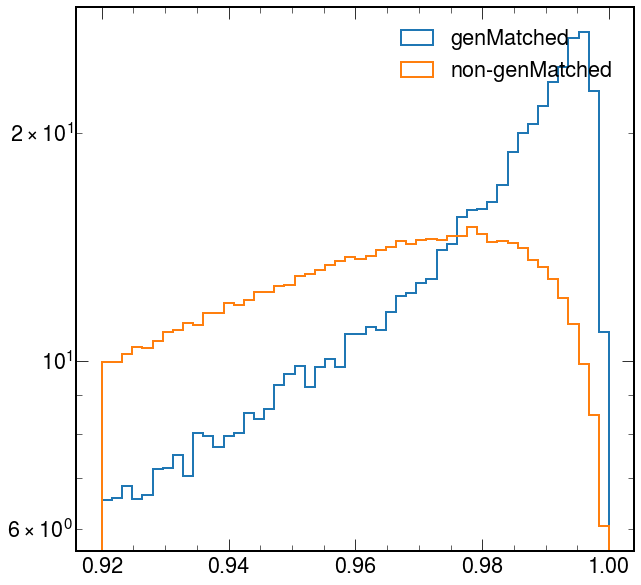

In [242]:
## Plotting a single observable
var_genMatched = np.array(observables_flat[(observables_flat.DeltaEta!=0) & (observables_flat.genMatching==1)]['explVarRatio'])
var_noGenMatched = np.array(observables_flat[(observables_flat.DeltaEta!=0) & (observables_flat.genMatching==0)]['explVarRatio'])
concat = np.concatenate([var_genMatched,var_noGenMatched])
rangea = [min(concat), max(concat)]
# rangea = [0,100]
plt.hist(var_genMatched, bins=50, histtype='step', lw=2, density=True, range=rangea, label='genMatched')
plt.hist(var_noGenMatched, bins=50, histtype='step', lw=2, density=True, range=rangea, label='non-genMatched')
plt.legend()
plt.yscale('log')
plt.show()

In [243]:
def plotObservables(_x, _y, _scaled = False):
    obs = {
           'DeltaPhi':           [[-0.5,0.5],   r'$\Delta\phi = \phi - \phi_{seed}$', False],
           'DeltaEta':           [[-0.10,0.10], r'$\Delta\eta = |\eta| - |\eta_{seed}|$', False],
           'theta':              [[0,2],        r'$\theta(seed, trackster)$', True],
           'theta_xz_seedFrame': [[0,2],        r'$\theta_{xz}^{seedFrame}(seed, trackster)$', True],
           'theta_yz_seedFrame': [[0,2],        r'$\theta_{yz}^{seedFrame}(seed, trackster)$', True],
           'theta_xy_cmsFrame':  [[0,3.14],     r'$\theta_{xy}^{cmsFrame}(seed, trackster)$', True],
           'theta_yz_cmsFrame':  [[0,2],        r'$\theta_{yz}^{cmsFrame}(seed, trackster)$', True],
           'theta_xz_cmsFrame':  [[0,2],        r'$\theta_{xz}^{cmsFrame}(seed, trackster)$', True],
           'explVar':            [[0,800],      r'explained variance', True],
           'explVarRatio':       [[0.92,1],     r'explained variance ratio', False],
          } 
    
    if _scaled:
        for key, value in obs.items():
            value[0] = [0,1]


    fig, axs = plt.subplots(2, 5, figsize=(32,13))
    axs = axs.ravel()

    for idx_var, var in enumerate(obs):
        axs[idx_var].hist(_x[var][_y==1], bins=50, histtype='step', color = 'tab:red', lw=2, range = obs[var][0], density=True, label='gen-matched tracksters')
        axs[idx_var].hist(_x[var][_y==0], bins=50, histtype='step', color = 'tab:blue', lw=2, range = obs[var][0], density=True, label='non-gen-matched tracksters')
        axs[idx_var].set_xlabel(obs[var][1], fontsize=20)
        if obs[var][2]:
            axs[idx_var].set_yscale('log')

    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles[::-1], labels[::-1], loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=2, fontsize=20, frameon=True)
    plt.savefig('inputs.pdf', dpi=150, bbox_inches='tight')
    
    plt.subplots_adjust(hspace=0.29)

    plt.show()

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


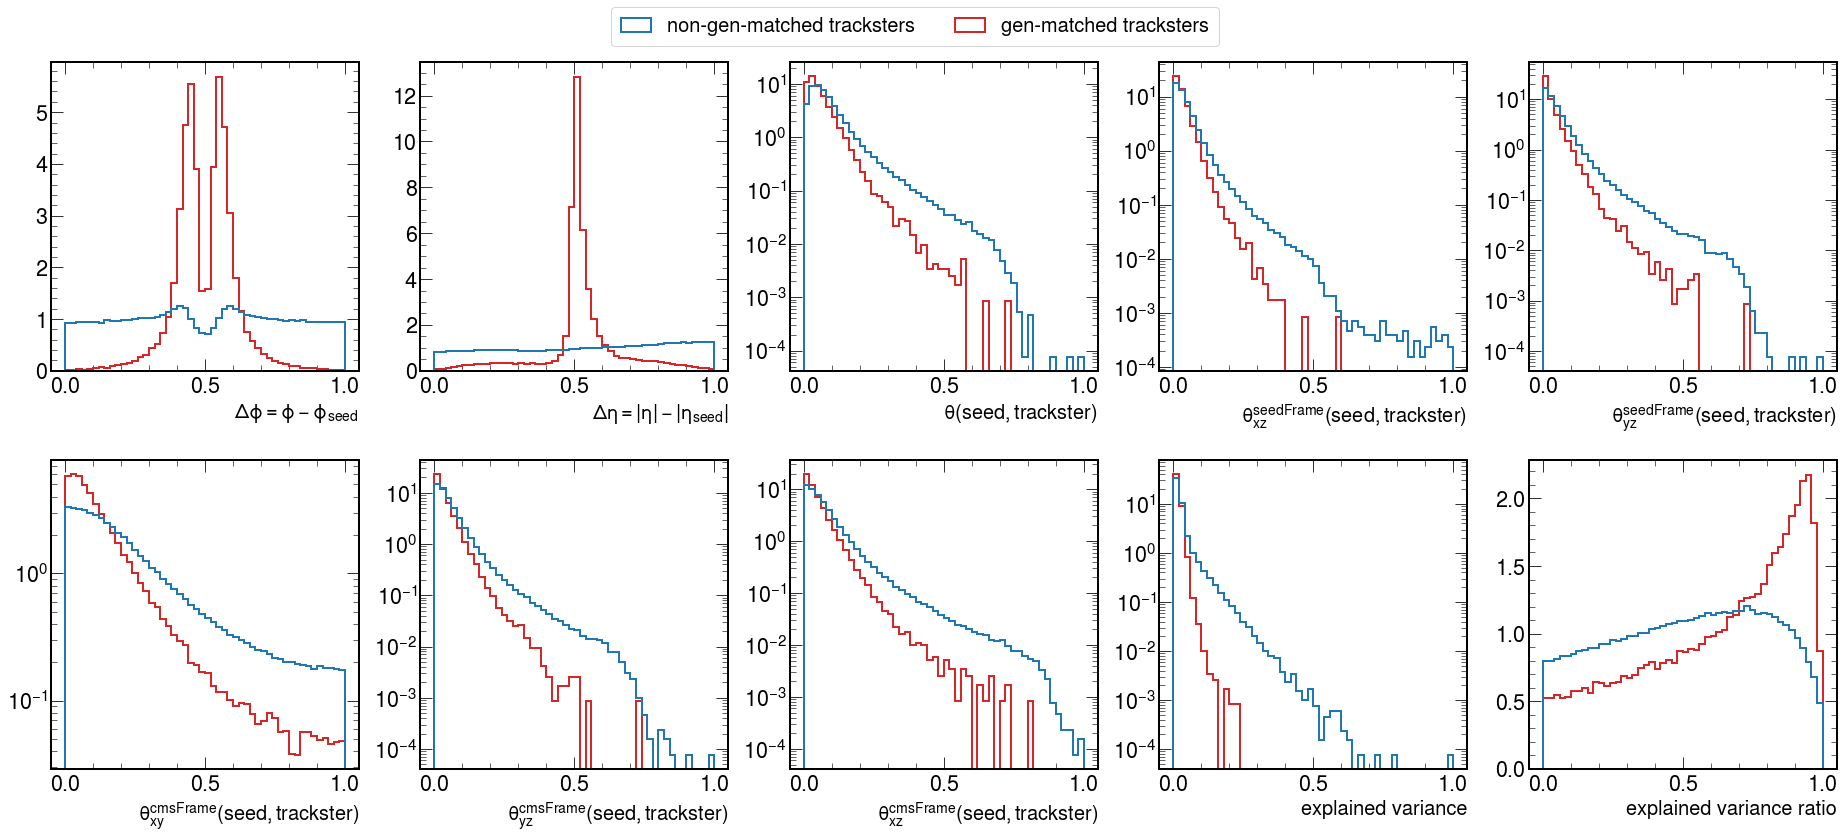

In [244]:
plotObservables(observables_flat_scaled, observables_flat_scaled['genMatching'], True)

# DNN training

In [10]:
## Creation of the dataset for training
## Same number of genMatched and non-genMatched tracksters
nEntries = len(observables_flat_scaled[(observables_flat_scaled['genMatching'] == True) & (observables_flat_scaled['DeltaEta']!=0)])
true_entries = observables_flat_scaled[(observables_flat_scaled['genMatching'] == True) & (observables_flat_scaled['DeltaEta']!=0)].sample(n=nEntries, random_state=25, replace=False)
false_entries = observables_flat_scaled[(observables_flat_scaled['genMatching'] == False) & (observables_flat_scaled['DeltaEta']!=0)].sample(n=nEntries, random_state=25, replace=False)
observables_forTraining = pd.concat([true_entries, false_entries], ignore_index=True)

In [11]:
def makeModel(_var, _X_train, _X_val, _y_train, _y_val, _name, _verbose = 0):
    
    if _verbose == 1:
        print('######### ----------- ######### Training ######### ----------- #########')
        plotObservables(_X_train, _y_train)
        print('######### ----------- ######### Validation ######### ----------- #########')
        plotObservables(_X_val, _y_val)
        
    _X_val_roc = _X_val[['multi_en_noScale', 'multi_eta_noScale']].values
        
    _X_train = _X_train[_var].values
    _X_val   = _X_val[_var].values
    
    
    ## Define the DNN model
    model = tensorflow.keras.Sequential(
    layers=[
        Input(shape=(_X_train.shape[1],)),
        Dense(100, activation="relu"),
        Dense(200, activation="relu"),
        Dense(100, activation="relu"),
        Dense(1, activation='sigmoid'),
        ]
    )
        
    ## Compile the model
    loss = tensorflow.keras.losses.BinaryCrossentropy(from_logits=False)
    model.compile(loss=loss, optimizer="adam", metrics=["accuracy"])
    if _verbose == 1: print(model.summary())
        
    ## Training
    batch_size = 8000
    n_epochs = 500

    history = model.fit(_X_train, _y_train, epochs=n_epochs, batch_size=batch_size, verbose = 1,
                    validation_data=(_X_val, _y_val),
                    callbacks = [
                    EarlyStopping(monitor='val_loss', patience=10, verbose=1),
                    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1),
                    TerminateOnNaN()])
    
    np.save('DNNmodels/history%s.npy' %(_name),history.history)
    
    ## Plot training history
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.yscale('log')
    plt.title('Training History')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='upper right')
    plt.savefig('DNNmodels/history_'+_name+'.pdf', dpi=150, bbox_inches='tight')
    plt.show()

    ## Plot scores
    predict_val = model.predict(_X_val) # This will also be used in the following blocks
    plt.hist(predict_val[_y_val==1].flatten(), histtype='step', density=False, range=[0,1], bins=80, lw=2, label='genMatched')
    plt.hist(predict_val[_y_val==0].flatten(), histtype='step', density=False, range=[0,1], bins=80, lw=2, label='non-genMatched')
    plt.xlabel('score')
    plt.ylabel('a.u.')
    plt.yscale('log')
    plt.legend(loc='upper left')
    plt.savefig('DNNmodels/scores_'+_name+'.pdf', dpi=150, bbox_inches='tight')
    plt.show()
    
    ## Computation of the accuracy at the two edges
    positives = predict_val[(_y_val==1)].flatten()
    negatives = predict_val[(_y_val==0)].flatten()

    cut = 0.95
    tp = len(positives[positives>cut])
    fp = len(negatives[negatives>cut])
    fn = len(positives[positives<cut])
    tn = len(negatives[negatives<cut])

    accuracy = (tp+tn)/(tp+tn+fp+fn)
    print('Accuracy around 1:', accuracy)

    cut=0.05
    tp = len(positives[positives>cut])
    fp = len(negatives[negatives>cut])
    fn = len(positives[positives<cut])
    tn = len(negatives[negatives<cut])

    accuracy = (tp+tn)/(tp+tn+fp+fn)
    print('Accuracy around 0:', accuracy)

    ## ROC Curve
    fpr, tpr, threshold = roc_curve(_y_val,predict_val)
    auc1 = auc(fpr, tpr)
    plt.plot(fpr,tpr,label='auc = %.1f%%'%(auc1*100.))
    # plt.semilogy()
    plt.ylabel("sig. efficiency")
    plt.xlabel("bkg. mistag rate")
    # plt.ylim(0.8,1)
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.savefig('DNNmodels/ROC_'+_name+'.pdf', dpi=150, bbox_inches='tight')
    plt.show()

    ## ROC curve by hand
    # sens = []
    # spec = []
    # tpr = []
    # fpr = []
    # for i in np.linspace(0,1,5000):
    #     tp = len(positives[positives>i])
    #     fp = len(negatives[negatives>i])
    #     fn = len(positives[positives<i])
    #     tn = len(negatives[negatives<i])

    #     sens.append(tp/(tp+fn))
    #     spec.append(fp/(fp+tn))


    # plt.plot(spec, sens)
    # print(auc(spec, sens))
    # plt.show()
    
    ## ROC curve in eta and en bins
    index_en = 0
    index_eta = 1
    ens = histedges_equalN(_X_val_roc[:,index_en], 5)
    etas = histedges_equalN(abs(_X_val_roc[:,index_eta]), 4)

    aucs = {}
    for b_ens in range(len(ens)-1):
        for b_etas in range(len(etas)-1):
            sel = (abs(_X_val_roc[:,index_eta])>etas[b_etas]) & (abs(_X_val_roc[:,index_eta])<etas[b_etas+1]) & (_X_val_roc[:,index_en]>ens[b_ens]) & (_X_val_roc[:,index_en]<ens[b_ens+1])
            predict_val = model.predict(_X_val[sel])
            fpr, tpr, threshold = roc_curve(_y_val[sel],predict_val)
            auc1 = auc(fpr, tpr)
            aucs[b_ens,b_etas] = auc1
            
    indices = np.array(list(aucs.keys()))
    values = np.array(list(aucs.values()))

    # Determine the matrix dimensions
    n_rows = indices[:, 0].max() + 1
    n_cols = indices[:, 1].max() + 1

    # Create an empty matrix
    matrix = np.zeros((n_rows, n_cols))

    # Fill in the matrix with the values from the dictionary
    matrix[indices[:, 0], indices[:, 1]] = values

    # Flip the matrix vertically
    matrix = np.flip(matrix, axis=0)

    # Plot the matrix
    cmap_reds = copy.copy(plt.cm.get_cmap("Reds"))
    cmap_reds.set_under('white')

    plt.imshow(matrix, cmap=cmap_reds)
    plt.xlabel(r"$|\eta_{trackster}|$")
    plt.ylabel(r"$E_{trackster}$")
    plt.colorbar()

    # Set the ticks for x-axis and y-axis
    x_ticks = np.arange(n_cols)  
    x_labels = ['[%.2f,%.2f]' %(etas[b], etas[b+1]) for b in range(len(etas)-1)]  # Custom text labels
    plt.xticks(x_ticks, x_labels)

    y_ticks = np.arange(n_rows)  # Y-axis tick positions
    y_labels = ['[%.1f,%.1f]' %(ens[b], ens[b+1]) for b in range(len(ens)-1)][::-1]  # Custom text labels
    plt.yticks(y_ticks, y_labels)

    # Hide the x-axis and y-axis scales
    plt.tick_params(axis='both', which='both', bottom=False, left=False)
    plt.title("AUC")
    
    plt.savefig('DNNmodels/ROC_bins_'+_name+'.pdf', dpi=150, bbox_inches='tight')

    plt.show()


    save_model(model, 'DNNmodels/model_'+_name+'.h5')

In [12]:
variables = {
    'v1_dEtadPhi': ['DeltaEta', 'DeltaPhi', 'multi_en', 'multi_eta', 'multi_pt', 'seedEta','seedPhi','seedEn', 'seedPt'],
    'v2_dEtadPhi': ['DeltaEta', 'DeltaPhi', 'multi_en', 'multi_eta', 'multi_pt', 'seedEta','seedPhi','seedEn', 'seedPt', 'theta', 'theta_xz_seedFrame', 'theta_yz_seedFrame', 'theta_xy_cmsFrame', 'theta_yz_cmsFrame', 'theta_xz_cmsFrame', 'explVar', 'explVarRatio'],

}
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:pink']

In [13]:
## Features and targets
observables_forTraining = observables_forTraining.dropna()
features = observables_forTraining
target = observables_forTraining['genMatching']
target = np.array([int(i) for i in target])

X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.33, random_state=42)

print('Number of tracksters for the training', len(X_train))
print('Number of tracksters for the validation', len(X_val))

Number of tracksters for the training 78751
Number of tracksters for the validation 38789


In [14]:
## Training and validation
for name, var in variables.items():
    makeModel(var, X_train, X_val, y_train, y_val, name)

######### ----------- ######### Training ######### ----------- #########


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


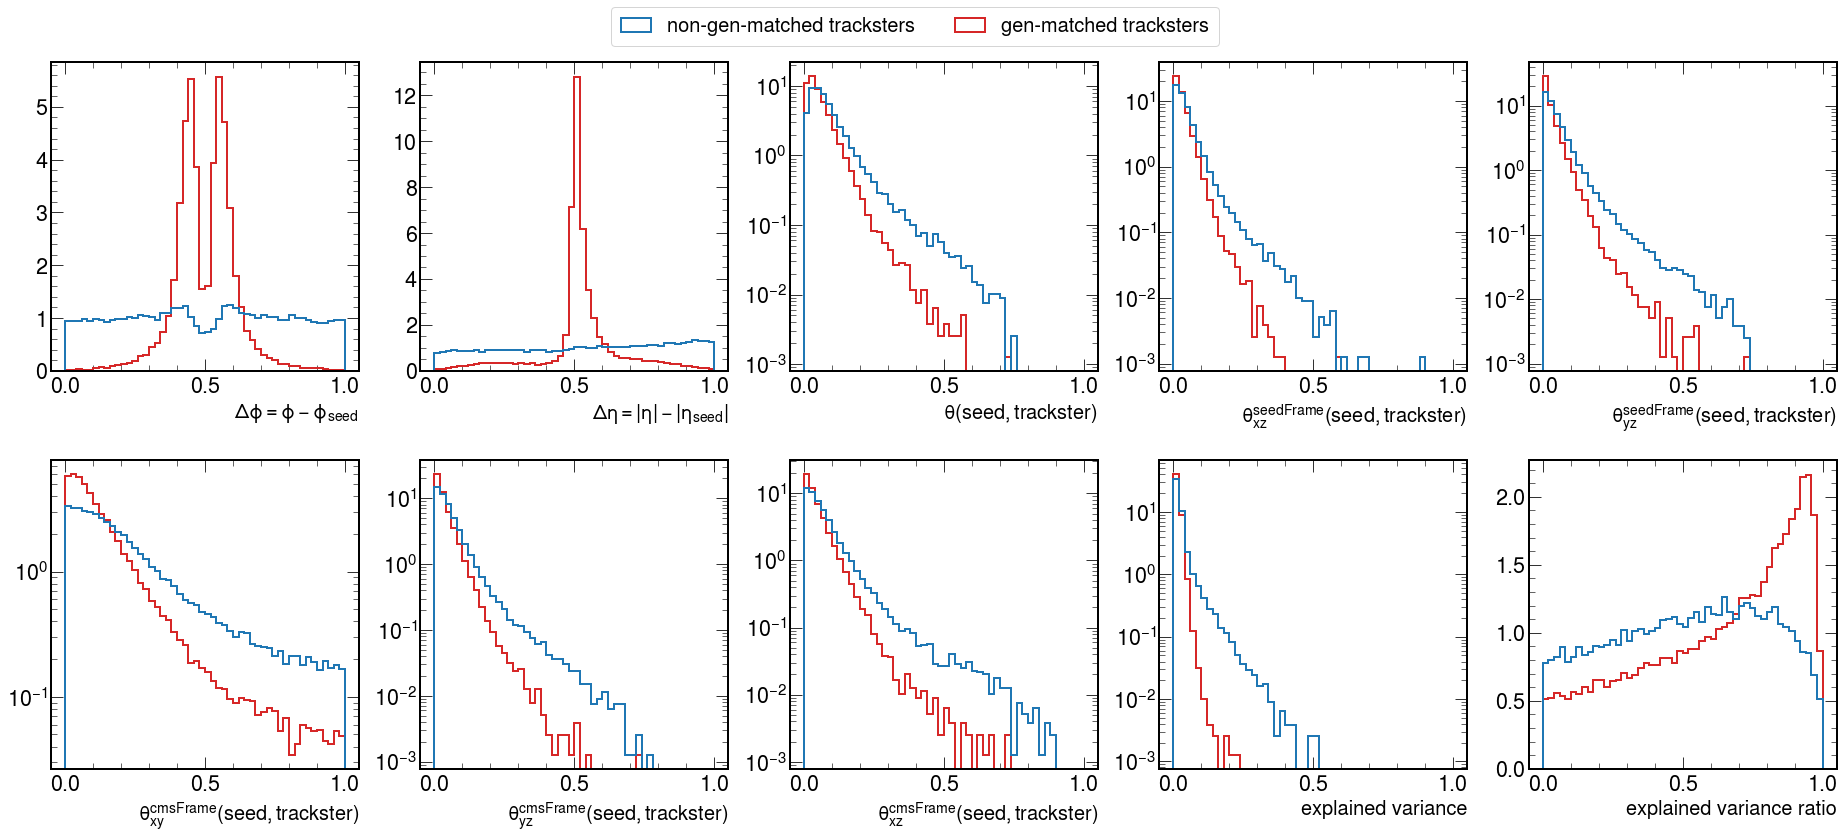

######### ----------- ######### Validation ######### ----------- #########


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


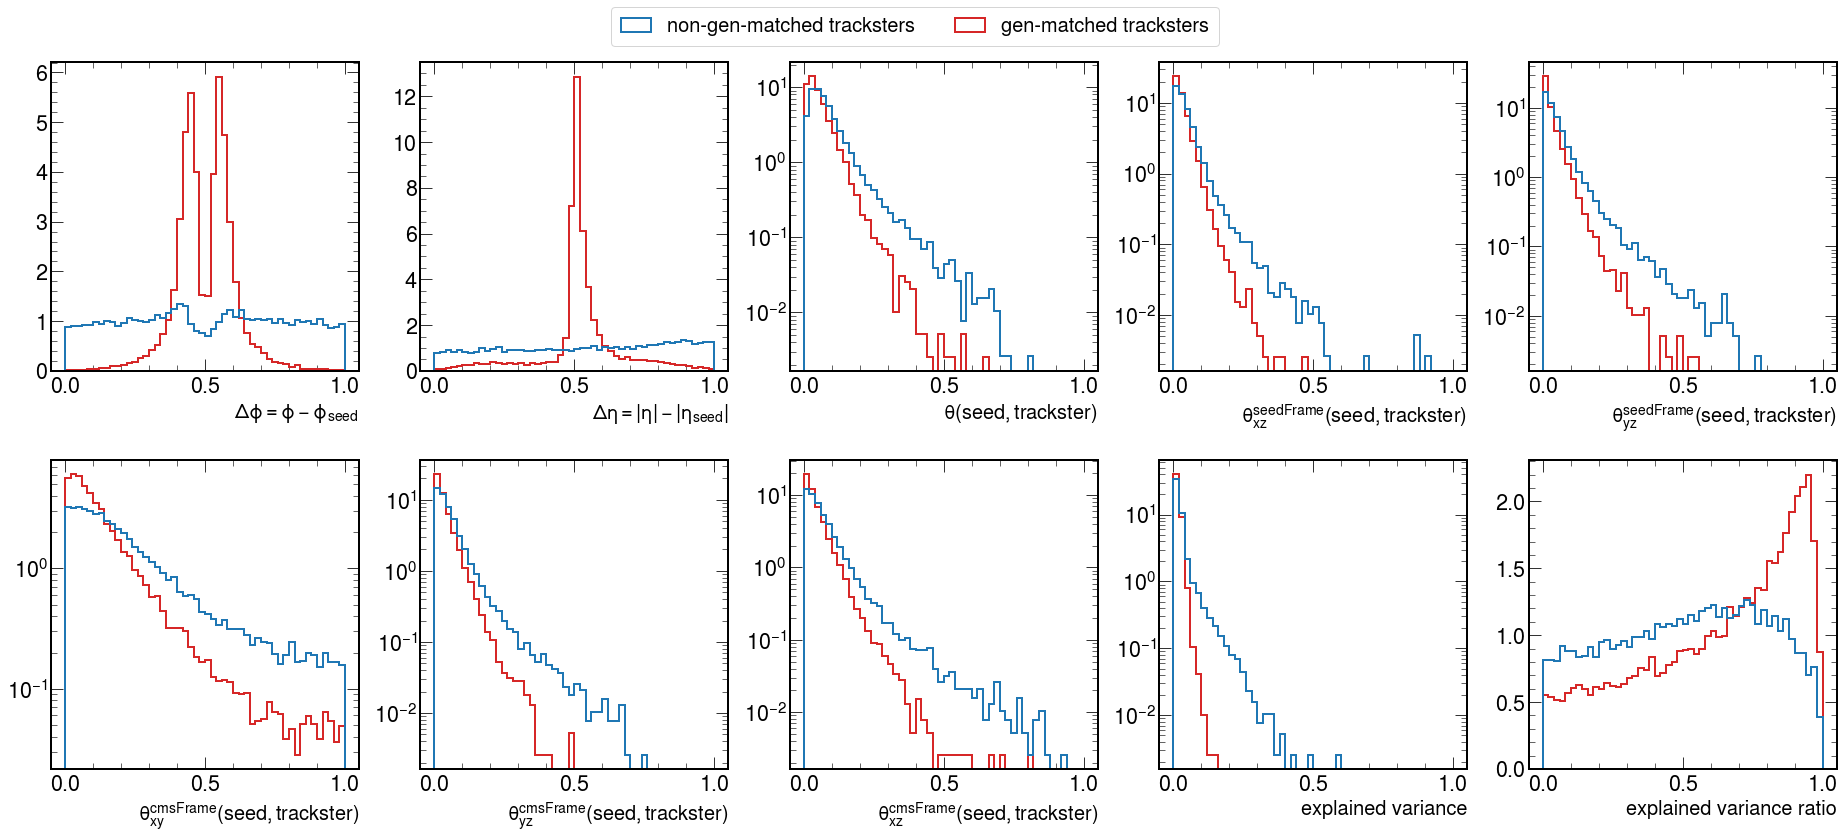

In [20]:
## To print the distributions for the training and validation dataset
print('######### ----------- ######### Training ######### ----------- #########')
plotObservables(X_train, y_train, True)
print('######### ----------- ######### Validation ######### ----------- #########')
plotObservables(X_val, y_val, True)

# DNN analysis
The training done in the previous section can be run ony once

The results of the training is stored in the DNNmodels folder 

Here the training is loaded and analysed

The only thing to create is the training and validation dataset X_val and X_train

In [15]:
def compareModels(_models, _X_val, _y_val):
    fig, axs = plt.subplots(2, 2, figsize=(20,14))
    axs = axs.ravel()
    
    colors = ['tab:blue', 'tab:red', 'tab:green', 'tab:orange', 'tab:purple', 'tab:pink']

    fprs = []
    tprs = []
    thresholds = []
    confMatrices = []
    for idx, mod in enumerate(_models):
        model = load_model('DNNmodels/model_'+mod+'.h5')
        
        ## Plot training history
        history = np.load('DNNmodels/history%s.npy' %(mod), allow_pickle=True)
        axs[0].plot(history.item()['loss'], color=colors[idx+1], label=mod, lw=2)
        axs[0].plot(history.item()['val_loss'], color=colors[idx+1], lw=2, ls='--')

        X_val_mod = _X_val[variables[mod]].values
        predict_val = model.predict(X_val_mod) 
        
        axs[1].hist(predict_val[_y_val==1].flatten(), histtype='step', density=False, range=[0,1], bins=80, lw=2, ls='-', color=colors[idx+1], label=mod+'_genMatched')
        axs[1].hist(predict_val[_y_val==0].flatten(), histtype='step', density=False, range=[0,1], bins=80, lw=2, ls='--', color=colors[idx+1], label=mod+'_non-genMatched')

        ## ROC Curve
        fpr, tpr, threshold = roc_curve(_y_val,predict_val)
        
        fprs.append(fpr)
        tprs.append(tpr)
        thresholds.append(threshold)
        
        auc1 = auc(fpr, tpr)
        axs[2].plot(fpr,tpr,label='%s auc = %.1f%%'%(mod,auc1*100.), color=colors[idx+1], lw=2)
        
        x_f = fpr[2:]
        x_t = tpr[2:]
        y = threshold[2:]
        axs[3].plot(y, x_t, color=colors[idx+1])
        axs[3].plot(y, x_f, color=colors[idx+1], ls='--')

        ## Evaluation of the working point: chosen to be the one that maximises the difference between the TPR and the FPR
        ## x_t-x_f is the difference between the TPR and the FPR 
        scoreMaxDiff = y[np.argmax(x_t-x_f)]
        print('WP', scoreMaxDiff)
        scoresThr[mod] = scoreMaxDiff

        axs[3].axvline(x=scoreMaxDiff, ls='dotted', color=colors[idx+1], lw=2)
        index = np.abs(y - scoreMaxDiff).argmin()
        target_y = x_f[index]
        xx = target_y
        print('FPR', target_y*100)
        target_y = x_t[index]
        yy = target_y
        print('TPR', target_y*100)
        print()
        
        print(xx, yy)
        axs[2].plot(xx, yy, 'bo', markersize=12, color=colors[idx+1])
        
        predict_val = [1 if entry>scoresThr[mod] else 0 for entry in predict_val]
        confMatrices.append(confusion_matrix(_y_val, predict_val))

        ## Computation of the accuracy
        positives = np.array(predict_val)[_y_val==1].flatten()
        negatives = np.array(predict_val)[_y_val==0].flatten()

        tp = len(positives[positives>scoreMaxDiff])
        fp = len(negatives[negatives>scoreMaxDiff])
        fn = len(positives[positives<scoreMaxDiff])
        tn = len(negatives[negatives<scoreMaxDiff])

        print('##########')
        print('TP', tp)
        print('FP', fp)
        print('fn', fn)
        print('tn', tn)
        print('accuracy', (tp+tn)/(tp+fp+fn+tn) * 100)
        print('##########')
    
    axs[0].set_yscale('log')
    axs[0].set_ylabel('loss')
    axs[0].set_xlabel('epoch')

    axs[1].set_xlabel('DNN score')
    axs[1].set_ylabel('a.u.')
    axs[1].set_yscale('log')
    
    axs[2].set_ylabel("sig. efficiency")
    axs[2].set_xlabel("bkg. mistag rate")
    axs[2].set_ylim(0.9,1)
    axs[2].grid(True)
    axs[2].legend()
    
    axs[3].set_xlabel('DNN score')
    axs[3].set_ylabel('Rate') 
    
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=len(_models), fontsize=25, frameon=True)
    
    plt.savefig('compareModels.pdf', dpi=100, bbox_inches='tight')
    plt.show()
    
    fig, axs = plt.subplots(1, 3, figsize=(17,6))
    axs = axs.ravel()
    
    for i, matrix in enumerate(confMatrices):
        matrix = matrix / [len(_X_val[_y_val==0]),len(_X_val[_y_val==1])] * 100
        sns.heatmap(matrix, annot=True, fmt=".2f", cmap="Blues", ax=axs[i])

        axs[i].set_xlabel("Predicted labels")
        axs[i].set_ylabel("True labels")
        axs[i].set_title("Confusion Matrix "+_models[i], fontsize=20)
        
    mousMatrix = confusion_matrix(_y_val, _X_val['moustache'])
    mousMatrix = mousMatrix / [len(_X_val[_y_val==0]),len(_X_val[_y_val==1])] * 100
    sns.heatmap(mousMatrix, annot=True, fmt=".2f", cmap="Blues", ax=axs[len(confMatrices)])
    axs[len(confMatrices)].set_xlabel("Predicted labels")
    axs[len(confMatrices)].set_ylabel("True labels")
    axs[len(confMatrices)].set_title("Confusion Matrix moustache", fontsize=20)
        
    plt.tight_layout()
    plt.show()

    
    return fprs, tprs, thresholds


WP 0.49477005
FPR 12.494167660324537
TPR 93.64615384615385

0.12494167660324537 0.9364615384615385
##########
TP 18260
FP 2410
fn 1240
tn 16879
accuracy 90.59011575446647
##########
WP 0.51120746
FPR 10.021255637928354
TPR 94.67692307692307

0.10021255637928353 0.9467692307692308
##########
TP 18461
FP 1933
fn 1039
tn 17356
accuracy 92.3380339787053
##########


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


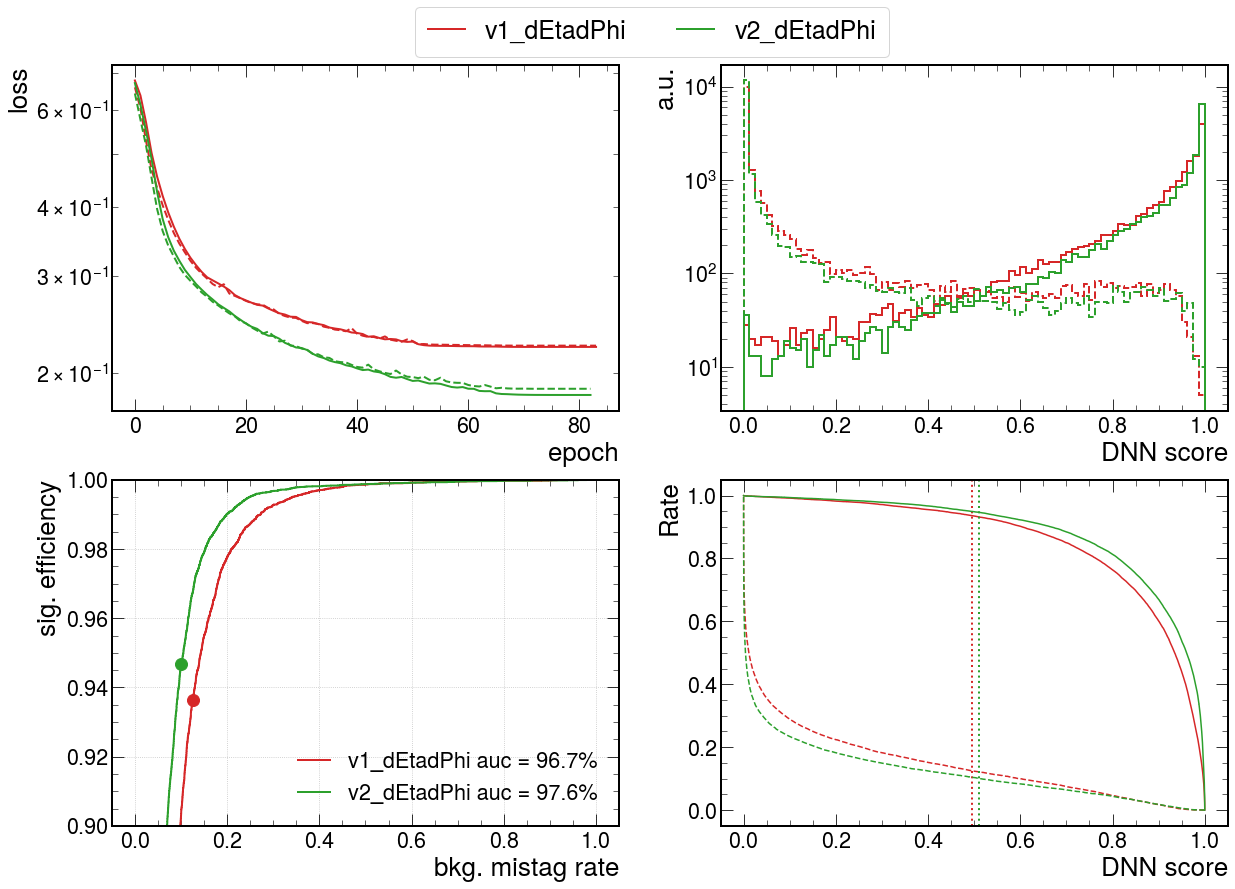

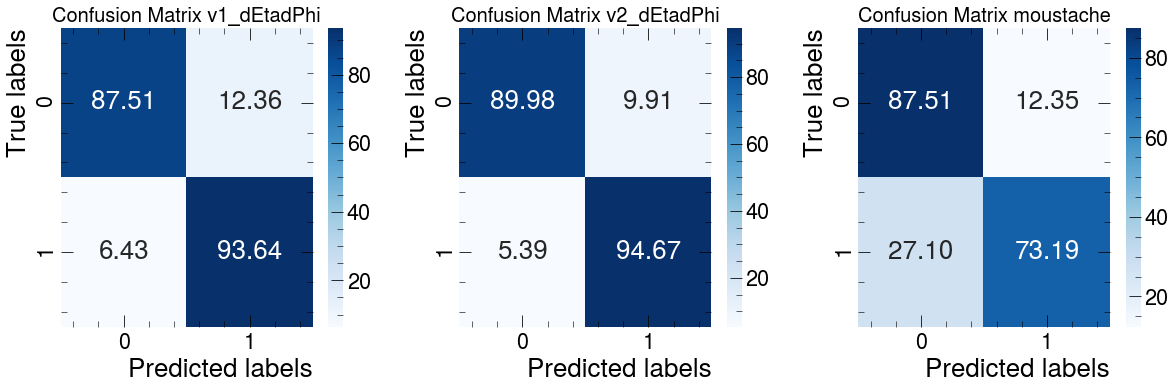

In [16]:
## The WP is defined here
scoresThr = {}
fpr, tpr, thr = compareModels(['v1_dEtadPhi', 'v2_dEtadPhi'], X_val, y_val)

In [17]:
## Computation of the rates
def computeRates(_X_val, _y_val, _rate = 'accuracy', _gun=False):
    matrices = []
    binning_eta = [1.65, 2.15, 2.75]
    binning_pt = [0, 30, 60, 100]
    
    ## inclusive values ##
    positives = _X_val['moustache'][_y_val==1]
    negatives = _X_val['moustache'][_y_val==0]

    tp = len(positives[positives==True])
    fp = len(negatives[negatives==True])
    fn = len(positives[positives==False])
    tn = len(negatives[negatives==False])
    print('Moustache')
    if _rate == 'accuracy':
        print((tp+tn)/(tp+fp+fn+tn) * 100) ##Accuracy
    elif _rate == 'TPR':
        print((tp)/(tp+fn) * 100) ##TPR
    elif _rate == 'TNR':
        print((tn)/(tn+fp) * 100) ##TNR
    elif _rate == 'FPR':
        print((fp)/(tp+fn) * 100) ##FPR
    elif _rate == 'FNR':
        print((fn)/(tp+fn) * 100) ##FNR
    elif _rate == 'PPV':
        print((tp)/(tp+fp) * 100) ##PPV
    elif _rate == 'FDR':
        print((fp)/(tp+fp) * 100) ##FDR
        
    for mod, var in variables.items():
        print('model '+mod)
        model = load_model('DNNmodels/model_'+mod+'.h5')
        X_val_mod = _X_val[var].values
        predict_val = model.predict(X_val_mod) 

        positives = np.array(predict_val)[_y_val==1].flatten()
        negatives = np.array(predict_val)[_y_val==0].flatten()

        tp = len(positives[positives>scoresThr[mod]])
        fp = len(negatives[negatives>scoresThr[mod]])
        fn = len(positives[positives<scoresThr[mod]])
        tn = len(negatives[negatives<scoresThr[mod]])

        if _rate == 'accuracy':
            print((tp+tn)/(tp+fp+fn+tn) * 100) ##Accuracy
        elif _rate == 'TPR':
            print((tp)/(tp+fn) * 100) ##TPR
        elif _rate == 'TNR':
            print((tn)/(tn+fp) * 100) ##TNR
        elif _rate == 'FPR':
            print((fp)/(tp+fn) * 100) ##FPR
        elif _rate == 'FNR':
            print((fn)/(tp+fn) * 100) ##FNR
        elif _rate == 'PPV':
            print((tp)/(tp+fp) * 100) ##PPV
        elif _rate == 'FDR':
            print((fp)/(tp+fp) * 100) ##FDR

    
    ## moustache ##
    accs = {}
    for i in range(len(binning_eta)-1):
        for j in range(len(binning_pt)-1):
            if _gun:
                sel = (X_val['gun_eta_abs']>binning_eta[i]) & (X_val['gun_eta_abs']<binning_eta[i+1]) & (X_val['gun_pt']>binning_pt[j]) & (X_val['gun_pt']<binning_pt[j+1])
            else:
                sel = (X_val['seedEtaAbs_noScale']>binning_eta[i]) & (X_val['seedEtaAbs_noScale']<binning_eta[i+1]) & (X_val['seedPt_noScale']>binning_pt[j]) & (X_val['seedPt_noScale']<binning_pt[j+1])
            positives = _X_val[sel]['moustache'][_y_val[sel]==1]
            negatives = _X_val[sel]['moustache'][_y_val[sel]==0]

            tp = len(positives[positives==True])
            fp = len(negatives[negatives==True])
            fn = len(positives[positives==False])
            tn = len(negatives[negatives==False])
            if _rate == 'accuracy':
                accs[j,i] = (tp+tn)/(tp+fp+fn+tn) * 100 ##Accuracy
            elif _rate == 'TPR':
                accs[j,i] = (tp)/(tp+fn) * 100 ##TPR
            elif _rate == 'TNR':
                accs[j,i] = (tn)/(tn+fp) * 100 ##TNR
            elif _rate == 'FPR':
                accs[j,i] = (fp)/(tp+fn) * 100 ##FPR
            elif _rate == 'FNR':
                accs[j,i] = (fn)/(tp+fn) * 100 ##FNR
            elif _rate == 'PPV':
                accs[j,i] = (tp)/(tp+fp) * 100 ##PPV
            elif _rate == 'FDR':
                accs[j,i] = (fp)/(tp+fp) * 100 ##FDR
    indices = np.array(list(accs.keys()))
    values = np.array(list(accs.values()))

    # Determine the matrix dimensions
    n_rows = indices[:, 0].max() + 1
    n_cols = indices[:, 1].max() + 1

    # Create an empty matrix
    matrix = np.zeros((n_rows, n_cols))

    # Fill in the matrix with the values from the dictionary
    matrix[indices[:, 0], indices[:, 1]] = values

    # Flip the matrix vertically
    matrix = np.flip(matrix, axis=0)
    matrices.append(matrix)

    for mod, var in variables.items():
        model = load_model('DNNmodels/model_'+mod+'.h5')
        accs = {}
        for i in range(len(binning_eta)-1):
            for j in range(len(binning_pt)-1):
                if _gun:
                    sel = (X_val['gun_eta_abs']>binning_eta[i]) & (X_val['gun_eta_abs']<binning_eta[i+1]) & (X_val['gun_pt']>binning_pt[j]) & (X_val['gun_pt']<binning_pt[j+1])
                else:
                    sel = (X_val['seedEtaAbs_noScale']>binning_eta[i]) & (X_val['seedEtaAbs_noScale']<binning_eta[i+1]) & (X_val['seedPt_noScale']>binning_pt[j]) & (X_val['seedPt_noScale']<binning_pt[j+1])
                X_val_mod = _X_val[sel][var].values
                predict_val = model.predict(X_val_mod) 

                positives = np.array(predict_val)[_y_val[sel]==1].flatten()
                negatives = np.array(predict_val)[_y_val[sel]==0].flatten()

                tp = len(positives[positives>scoresThr[mod]])
                fp = len(negatives[negatives>scoresThr[mod]])
                fn = len(positives[positives<scoresThr[mod]])
                tn = len(negatives[negatives<scoresThr[mod]])

                if _rate == 'accuracy':
                    accs[j,i] = (tp+tn)/(tp+fp+fn+tn) * 100 ##Accuracy
                elif _rate == 'TPR':
                    accs[j,i] = (tp)/(tp+fn) * 100 ##TPR
                elif _rate == 'TNR':
                    accs[j,i] = (tn)/(tn+fp) * 100 ##TNR
                elif _rate == 'FPR':
                    accs[j,i] = (fp)/(tp+fn) * 100 ##FPR
                elif _rate == 'FNR':
                    accs[j,i] = (fn)/(tp+fn) * 100 ##FNR
                elif _rate == 'PPV':
                    accs[j,i] = (tp)/(tp+fp) * 100 ##PPV
                elif _rate == 'FDR':
                    accs[j,i] = (fp)/(tp+fp) * 100 ##FDR

        indices = np.array(list(accs.keys()))
        values = np.array(list(accs.values()))

        # Determine the matrix dimensions
        n_rows = indices[:, 0].max() + 1
        n_cols = indices[:, 1].max() + 1

        # Create an empty matrix
        matrix = np.zeros((n_rows, n_cols))

        # Fill in the matrix with the values from the dictionary
        matrix[indices[:, 0], indices[:, 1]] = values

        # Flip the matrix vertically
        matrix = np.flip(matrix, axis=0)
        matrices.append(matrix)
                
        
    fig, axs = plt.subplots(1, 3, figsize=(15,6))
    axs = axs.ravel()
    
    titles = [_rate+' Moustache', _rate+' DNNv1', _rate+' DNNv2']
    
    vmin_value = min(np.array(matrices).flatten())
    vmax_value = max(np.array(matrices).flatten())
    for i, matrix in enumerate(matrices):
        x_labels = ['[%.2f,%.2f]' %(binning_eta[b], binning_eta[b+1]) for b in range(len(binning_eta)-1)]  # Custom text labels
        sns.heatmap(matrix, annot=True, fmt=".2f", cmap="Blues", ax=axs[i], vmin=vmin_value, vmax=vmax_value, xticklabels=x_labels, cbar=False)
        axs[i].set_title(titles[i], fontsize=20, fontweight="bold")
        
        y_ticks = np.arange(n_rows) + 0.25  # Y-axis tick positions
        y_labels = ['[%.0f,%.0f]' %(binning_pt[b], binning_pt[b+1]) for b in range(len(binning_pt)-1)][::-1]  # Custom text labels
        axs[i].set_yticks(y_ticks)
        axs[i].set_yticklabels(y_labels)
    
        axs[i].tick_params(axis=u'both', which=u'both',length=0)
        
        if _gun:
            axs[i].set_ylabel(r'$E_{T,GEN}$ (GeV)')
            axs[i].set_xlabel(r'$|\eta_{GEN}|$')
        else:
            axs[i].set_ylabel(r'$E_{T,seed}$ (GeV)')
            axs[i].set_xlabel(r'$|\eta_{seed}|$')
    
    plt.subplots_adjust(wspace=0.35)
    
    plt.savefig(_rate+'.pdf', dpi=500, bbox_inches='tight')
    plt.tight_layout()
    plt.show()


Moustache
12.353846153846154
model v1_dEtadPhi
12.35960818503513
model v2_dEtadPhi
9.913328888660956


'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


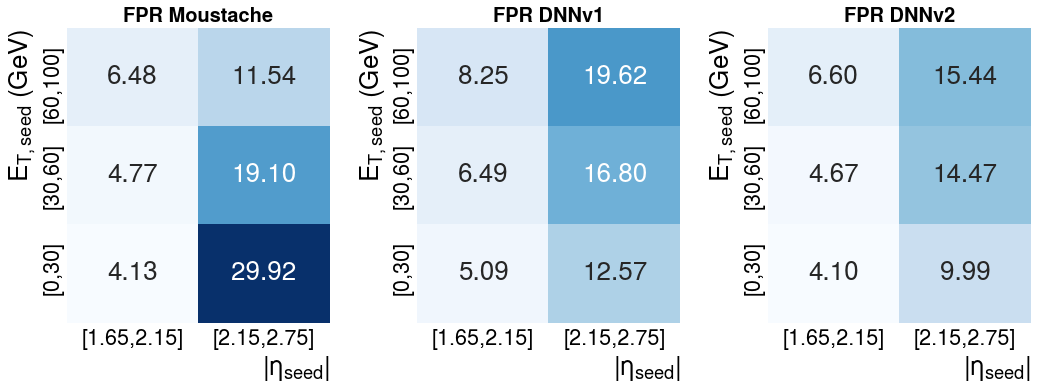

Moustache
73.1897435897436
model v1_dEtadPhi
93.64582799117903
model v2_dEtadPhi
94.67665008461972


'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


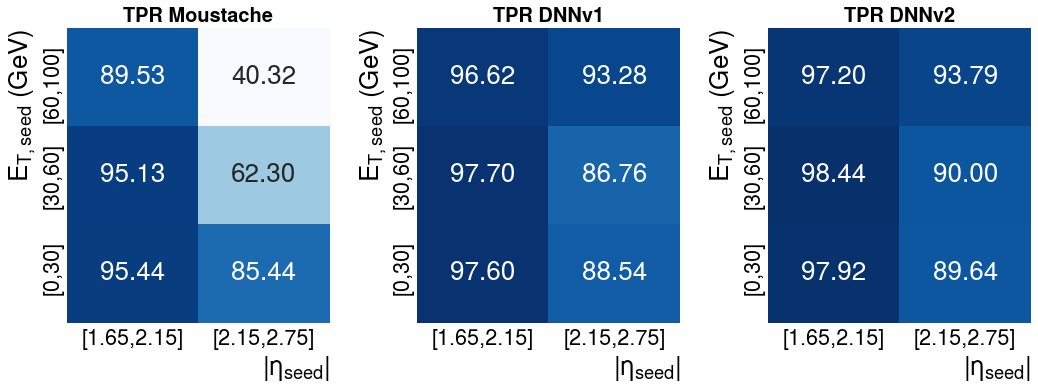

In [18]:
## The third option is the rate to compute
## Five possibilities: accuracy, TNR, TPR, FNR, FPR, PPV, FDR (default: accuracy)
computeRates(X_val, y_val, 'FPR')
computeRates(X_val, y_val, 'TPR')
# computeRates(X_val, y_val, 'PPV')

In [269]:
## Plots for thesis
def compareModels_forThesis(_models, _X_val, _y_val):
    
    colors = ['tab:blue', 'tab:red', 'tab:green', 'tab:orange', 'tab:purple', 'tab:pink']

    fig = plt.figure(figsize=(10,7), dpi=85)
    for idx, mod in enumerate(_models):
        model = load_model('DNNmodels/model_'+mod+'.h5')
        

        ## Plot training history
        history = np.load('DNNmodels/history%s.npy' %(mod), allow_pickle=True)
        plt.plot(history.item()['loss'], color=colors[idx+1], label=mod[:-9]+' training', lw=2)
        plt.plot(history.item()['val_loss'], color=colors[idx+1], lw=2, ls='--', label=mod[:-9]+' validation')
#         plt.legend(, loc='upper right')
    plt.yscale('log')
    plt.ylabel('Loss')
    plt.xlabel('Training iteration')
    plt.legend()
    plt.savefig('loss_forThesis.pdf', dpi=100, bbox_inches='tight')
    plt.show()

    fig = plt.figure(figsize=(10,7), dpi=85)
    for idx, mod in enumerate(_models):
        model = load_model('DNNmodels/model_'+mod+'.h5')
        X_val_mod = _X_val[variables[mod]].values
        predict_val = model.predict(X_val_mod) 
    
        plt.hist(predict_val[_y_val==1].flatten(), histtype='step', density=False, range=[0,1], bins=80, lw=2, ls='-', color=colors[idx+1], label=mod[:-9]+' gen-matched')
        plt.hist(predict_val[_y_val==0].flatten(), histtype='step', density=False, range=[0,1], bins=80, lw=2, ls='--', color=colors[idx+1], label=mod[:-9]+' non-gen-matched')
    plt.xlabel('DNN score')
    plt.ylabel('a.u.')
    plt.yscale('log')
    plt.legend(loc='upper center')
    plt.savefig('DNNscores_forThesis.pdf', dpi=100, bbox_inches='tight')
    plt.show()
        
    fprs = []
    tprs = []
    thresholds = []
    confMatrices = []
    fig = plt.figure(figsize=(10,7), dpi=85)
    for idx, mod in enumerate(_models):
        model = load_model('DNNmodels/model_'+mod+'.h5')
        X_val_mod = _X_val[variables[mod]].values
        predict_val = model.predict(X_val_mod) 
        fpr, tpr, threshold = roc_curve(_y_val,predict_val)
        
        fprs.append(fpr)
        tprs.append(tpr)
        thresholds.append(threshold)
        
        auc1 = auc(fpr, tpr)

        x_f = fpr[2:]
        x_t = tpr[2:]
        y = threshold[2:]

        ## Evaluation of the working point
        ## x_t-x_f It's the difference between the TPR and the FPR 
        scoreMaxDiff = y[np.argmax(x_t-x_f)]
        print('WP', scoreMaxDiff)
        scoresThr[mod] = scoreMaxDiff

        index = np.abs(y - scoreMaxDiff).argmin()
        target_y = x_f[index]
        xx = target_y
        print('FPR', target_y*100)
        target_y = x_t[index]
        yy = target_y
        print('TPR', target_y*100)
        print()
        
        print(xx, yy)
        
        ## ROC Curve
        
        plt.plot(fpr,tpr,label='%s AUC = %.1f%%'%(mod[:-9],auc1*100.), color=colors[idx+1], lw=2)
        plt.plot(xx, yy, 'bo', markersize=12, color=colors[idx+1], label=mod[:-9]+' working point')

        
        predict_val = [1 if entry>scoresThr[mod] else 0 for entry in predict_val]
        confMatrices.append(confusion_matrix(_y_val, predict_val))
        
    plt.ylabel("Signal efficiency")
    plt.xlabel("Background efficiency")
    plt.ylim(0.9,1)
    plt.grid(True)
    plt.legend()
    plt.savefig('auc_forThesis.pdf', dpi=100, bbox_inches='tight')
    plt.show()

    fig, axs = plt.subplots(1, 3, figsize=(17,6))
    axs = axs.ravel()
    
    for i, matrix in enumerate(confMatrices):
        matrix = matrix / [len(_X_val[_y_val==0]),len(_X_val[_y_val==1])] * 100
        sns.heatmap(matrix, annot=True, fmt=".2f", cmap="Blues", ax=axs[i+1])

        axs[i+1].set_xlabel("Predicted labels")
        axs[i+1].set_ylabel("True labels")
        axs[i+1].set_title(r"$\bf{Confusion~Matrix~DNN"+_models[i][:-9]+'}$', fontsize=19)
        
    mousMatrix = confusion_matrix(_y_val, _X_val['moustache'])
    mousMatrix = mousMatrix / [len(_X_val[_y_val==0]),len(_X_val[_y_val==1])] * 100
    sns.heatmap(mousMatrix, annot=True, fmt=".2f", cmap="Blues", ax=axs[0])
    axs[0].set_xlabel("Predicted labels")
    axs[0].set_ylabel("True labels")
    axs[0].set_title(r"$\bf{Confusion~Matrix~Moustache}$", fontsize=19)
        
    plt.tight_layout()
    plt.savefig('confusionMatrix_forThesis.pdf', dpi=100, bbox_inches='tight')
    plt.show()

    
    return fprs, tprs, thresholds


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


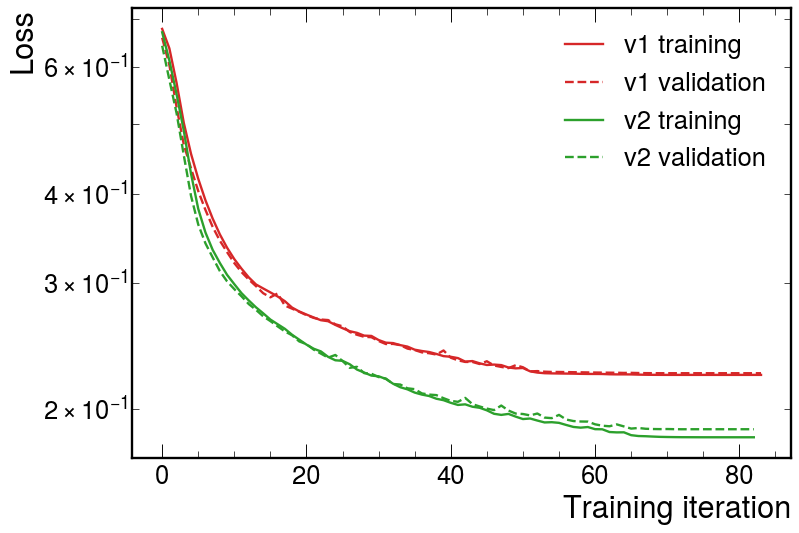

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


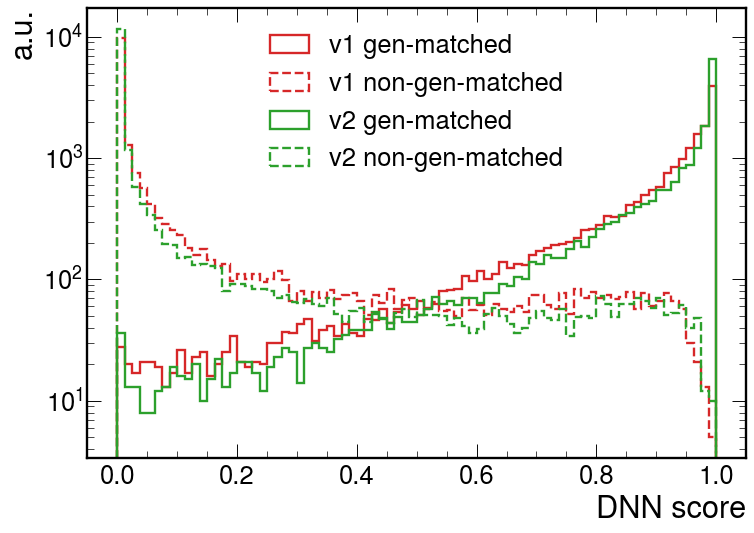

WP 0.49477005
FPR 12.494167660324537
TPR 93.64615384615385

0.12494167660324537 0.9364615384615385
WP 0.51120746
FPR 10.021255637928354
TPR 94.67692307692307

0.10021255637928353 0.9467692307692308


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


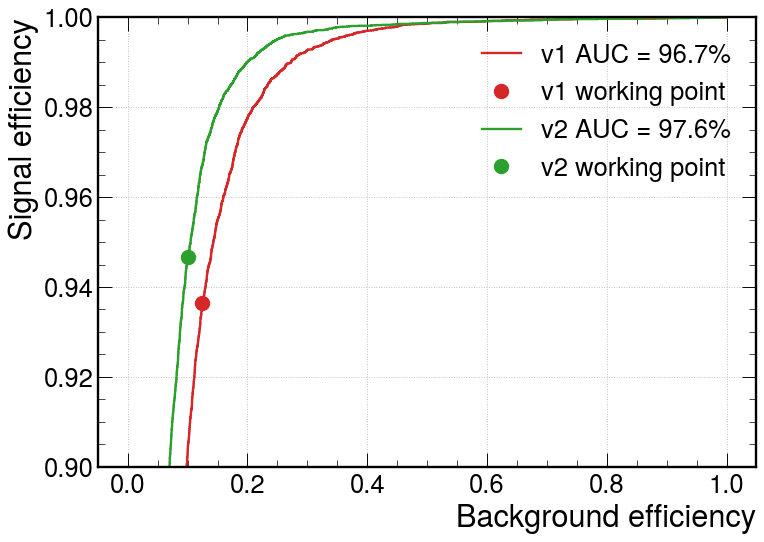

'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


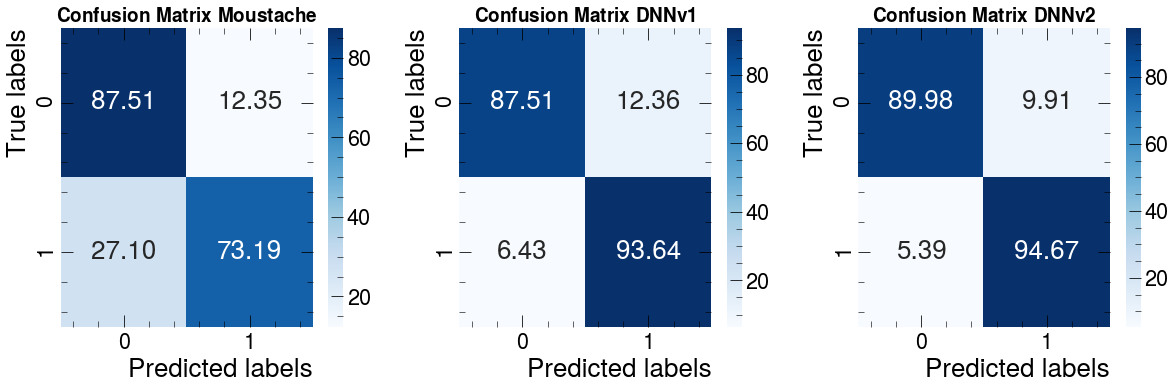

In [270]:
fpr, tpr, thr = compareModels_forThesis(['v1_dEtadPhi', 'v2_dEtadPhi'], X_val, y_val)

### WP in bins of en
Tried, but no big differences

In [19]:
def WPen(_var, _X_val, _y_val, _name):
    
    model = load_model('DNNmodels/model_'+_name+'.h5')
    
    _X_val   = _X_val[_var].values
    predict_val = model.predict(_X_val) 

    index_en = 2
    ens = histedges_equalN(_X_val[:,index_en], 4)

    scores = {}
    fig, axs = plt.subplots(2, 4, figsize=(30,14))
#     axs = axs.ravel()
    colors_en = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
    for b_ens in range(len(ens)-1):
        print(ens[b_ens], ens[b_ens+1])
        sel = (_X_val[:,index_en]>ens[b_ens]) & (_X_val[:,index_en]<ens[b_ens+1])
        predict_val = model.predict(_X_val[sel])
        
        axs[0,b_ens].hist(predict_val[_y_val[sel]==1].flatten(), histtype='step', density=False, range=[0,1], bins=40, lw=2, ls='-', color='tab:blue', label=name+'_genMatched')
        axs[0,b_ens].hist(predict_val[_y_val[sel]==0].flatten(), histtype='step', density=False, range=[0,1], bins=40, lw=2, ls='--', color='tab:red', label=name+'_non-genMatched')
        axs[0,b_ens].set_yscale('log')
        
        fpr, tpr, threshold = roc_curve(_y_val[sel],predict_val)
#         auc1 = auc(fpr, tpr)
#         aucs[b_pts,b_etas] = auc1

        x_f = fpr[2:]
        x_t = tpr[2:]
        y = threshold[2:]
        
        axs[1,b_ens].plot(y, x_t, label='v'+var[1]+' TPR', color='tab:red')
        axs[1,b_ens].plot(y, x_f, label='v'+var[1]+' FPR', color='tab:red', ls='--')


        ## Evaluation of the working point
        ## x_t-x_f It's the difference between the TPR and the FPR 
        scoreMaxDiff = y[np.argmax(x_t-x_f)]
        scores[ens[b_ens], ens[b_ens+1]] = scoreMaxDiff
        
        index = np.abs(y - scoreMaxDiff).argmin()
        target_y = x_f[index]
        xx = target_y
        print('FPR', target_y*100)
#         index = np.abs(x_t - scoreMaxDiff).argmin()
        target_y = x_t[index]
        yy = target_y
        print('TPR', target_y*100)
        print()

    plt.show()
    return scores




2.2776042188539514e-07 0.0040947574899423845
FPR 19.799319118437555
TPR 93.5131195335277

0.0040947574899423845 0.01144048637736638
FPR 15.98892541962277
TPR 94.02756508422665

0.01144048637736638 0.030224108474916397
FPR 9.356834802175136
TPR 93.17140238313473

0.030224108474916397 0.7093648399084291
FPR 5.084745762711865
TPR 97.0



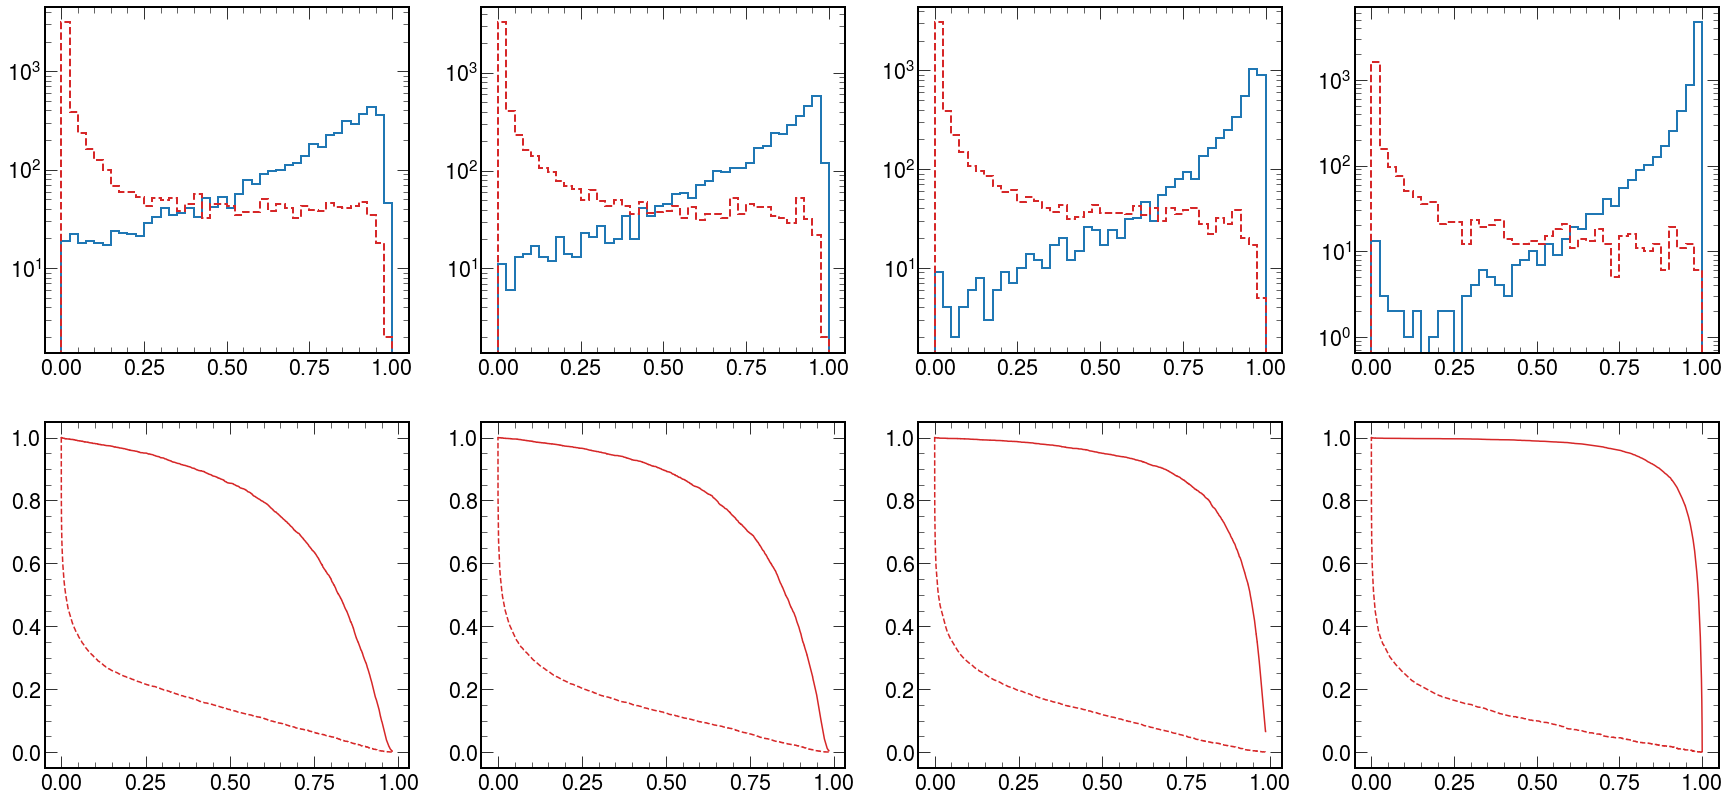

2.2776042188539514e-07 0.0040947574899423845
FPR 15.391506898405305
TPR 94.72789115646259

0.0040947574899423845 0.01144048637736638
FPR 11.334140854819173
TPR 94.66564573762125

0.01144048637736638 0.030224108474916397
FPR 8.081755109694356
TPR 95.6461961503208

0.030224108474916397 0.7093648399084291
FPR 3.1587057010785826
TPR 96.25352112676056



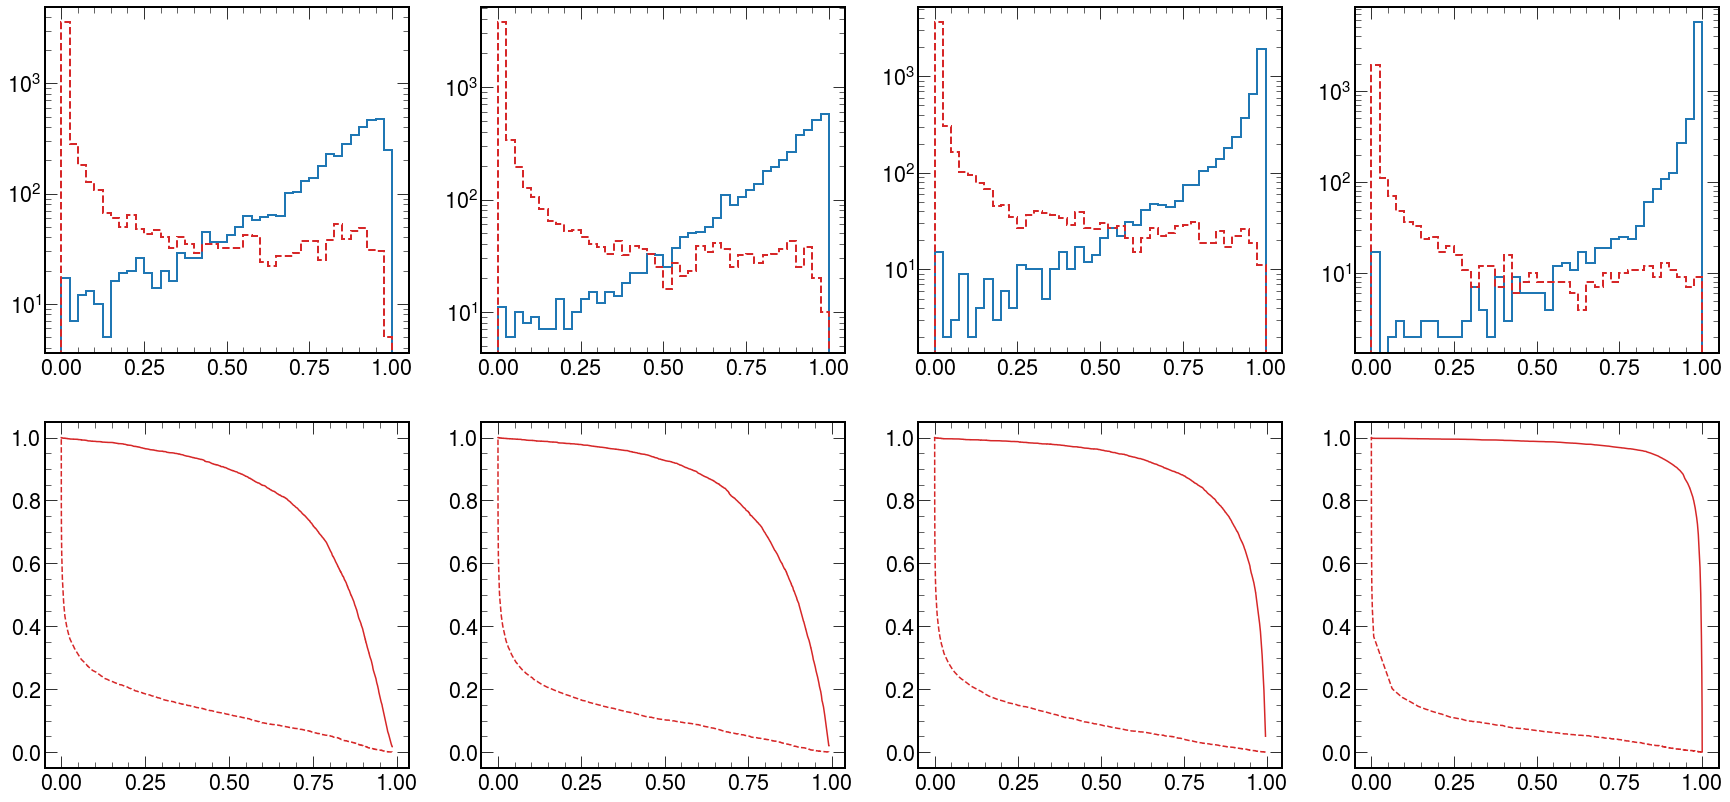

In [20]:
scoresThrEn = {}
for name, var in variables.items():
    scoresThrEn[name] = WPen(var, X_val, y_val, name)

# Evaluation of the DNN scores

In [19]:
def evalModel(_variables, _model):
    model = load_model('DNNmodels/model_'+_model+'.h5')
    orig = _variables[0]
    inputs_a = []
    for var in _variables:
        try:
            inputs_a.append(np.concatenate(var))
        except ValueError as e:
            if str(e) == "zero-dimensional arrays cannot be concatenated": 
                var_seed = [np.full(len(orig[idx]), seed) for idx, seed in enumerate(var)]
                inputs_a.append(np.concatenate(var_seed))
            else: 
                raise
                
    inputs = np.array([np.array(entries) for entries in zip(*inputs_a)])
    scores = model.predict(inputs, batch_size = 10000, use_multiprocessing=True).flatten()
    scores = np.split(scores, np.cumsum([len(arr) for arr in orig])[:-1])
    return scores

## Setting to zero by default the DNNscores for all tracksters outside the dEta dPhi window
def fixScoreEtaPhiWind(score, dEta, dPhi):
    score_tmp = score
    score_tmp[(abs(dEta)>etaWind)|(abs(dPhi)>phiWind)] = 0
    return score_tmp

def fixScoreSeed(score, pt):
    score_tmp = score
    score_tmp[np.argmax(pt)] = 1
    return score_tmp

In [20]:
for name, var in variables.items():
    ## observables_scaled
    scoreVars = []
    for value in variables[name]:
        scoreVars.append(observables_scaled[value])
    observables_scaled['DNNscores_'+name] = evalModel(scoreVars, name)
    print('Model_'+name, 'done')
    
    ## observables_scaled_plot
    scoreVars = []
    for value in variables[name]:
        scoreVars.append(observables_scaled_plot[value])
    observables_scaled_plot['DNNscores_'+name] = evalModel(scoreVars, name)
    print('Model_'+name, 'done')

Model_v1_dEtadPhi done
Model_v1_dEtadPhi done
Model_v2_dEtadPhi done
Model_v2_dEtadPhi done


# Resolution

In [21]:
def computeRes(recoEn, genEn, enSeed, score, name, enDep=[]):
    recoEn = np.array(recoEn)
    genEn  = np.array(genEn)
    score  = np.array(score)
    
    if enDep:
        idxs = []
        for idx, enTrk in enumerate(enDep):  
            for key, value in scoresThrEn[name].items():
                if key[0] <= enTrk <= key[1] and score[idx]>value:
                    idxs.append(idx)
        sumRecoEn = enSeed + sum(recoEn[idxs])
    else:
        sumRecoEn = enSeed + sum(recoEn[score>scoresThr[name]])
    res       = sumRecoEn/genEn
    
    return res

def computeResMoustache(recoEn, genEn, enSeed, score):
    recoEn = np.array(recoEn)
    genEn = np.array(genEn)
    score = np.array(score)
    res = (enSeed + sum(recoEn[score]))/genEn
    return res



def makeResPlotInput(_input):
    median = np.median(_input)
    width = np.percentile(_input, 84.13) - np.percentile(_input, 15.87)
    return width/median

def makeResPlot(_bin_var, _bin_var_second, _bins, _eta=[]):
    ratio = []
    ratio_clean = []
    res_v = []
    res_clean_v = []
    res_moustache_v = []
    res_moustache_clean_v = []

    ratio_moustache = []
    ratio_moustache_clean = []
    
    res_v = {}
    res_clean_v = {}
    res_p = {}
    res_clean_p = {}

    for name, var in variables_comparison.items():
        res_v[name]       = []
        res_clean_v[name] = []
        res_p[name]       = []
        res_clean_p[name] = []

        for b in range(len(_bins)-1):
            
            sel = (observables_scaled[_bin_var]>_bins[b]) & (observables_scaled[_bin_var]<_bins[b+1])
            if _eta:
                sel &= (abs(observables_scaled[_bin_var_second])>_eta[0]) & (abs(observables_scaled[_bin_var_second])<_eta[1])
            
            res = observables_scaled[sel]['res_'+name]
            res_v[name].append(res)
            res_p[name].append(makeResPlotInput(res))

            res = observables_scaled[sel]['res_clean_'+name]
            res_clean_v[name].append(res)
            res_clean_p[name].append(makeResPlotInput(res))
            
    return res_v, res_p, res_clean_v, res_clean_p


In [22]:
## Compute the Esupercluster/Egen

## Unique WP
for name, var in variables.items():
    observables_scaled['res_'+name] = [computeRes(row[0], row[1], row[2], row[3], name) for row in observables_scaled[['multi_en_noScale', 'gun_en', 'seedEn_noScale', 'DNNscores_'+name]].to_numpy()]
    observables_scaled['res_clean_'+name] = [computeRes(row[0], row[1], row[2], row[3], name) for row in observables_scaled[['cleaned_en', 'gun_en', 'seedEn_noScale', 'DNNscores_'+name]].to_numpy()]

## en-dependent WP
# for name, var in variables.items():
#     observables_scaled['res_'+name] = [computeRes(row[0], row[1], row[2], row[3], name, row[4]) for row in observables_scaled[['multi_en_noScale', 'gun_en', 'seedEn_noScale', 'DNNscores_'+name, 'multi_en']].to_numpy()]
#     observables_scaled['res_clean_'+name] = [computeRes(row[0], row[1], row[2], row[3], name, row[4]) for row in observables_scaled[['cleaned_en', 'gun_en', 'seedEn_noScale', 'DNNscores_'+name, 'multi_en']].to_numpy()]

    
observables_scaled['res_moustache'] = [computeResMoustache(row[0], row[1], row[2], row[3]) for row in observables_scaled[['multi_en_noScale', 'gun_en', 'seedEn_noScale', 'moustache']].to_numpy()]
observables_scaled['res_clean_moustache'] = [computeResMoustache(row[0], row[1], row[2], row[3]) for row in observables_scaled[['cleaned_en', 'gun_en', 'seedEn_noScale', 'moustache']].to_numpy()]

In [49]:
def cruijff(x, A, m, sigmaL,sigmaR, alphaL, alphaR):
    dx = (x-m)
    SL = np.full(x.shape, sigmaL)
    SR = np.full(x.shape, sigmaR)
    AL = np.full(x.shape, alphaL)
    AR = np.full(x.shape, alphaR)
    sigma = np.where(dx<0, SL,SR)
    alpha = np.where(dx<0, AL,AR)
    f = 2*sigma*sigma + alpha*dx*dx ;
    return A* np.exp(-dx*dx/f)

## Calculating the Gaussian PDF values given Gaussian parameters and random variable X
def gaus(X,C,X_mean,sigma):
    return C*np.exp(-(X-X_mean)**2/(2*sigma**2))


def computeResFit(x_data, special = False, ax = False, col = False, algo = False):
    nbins = 40
    mean = np.median(x_data)
    std = np.percentile(x_data, 84.13) - np.percentile(x_data, 15.87)
    rangea = [mean-3*std, mean+3*std]
    if special:
#         mean = 1
        nbins = 47
        rangea = [0.6,3.]
#         if morethanspecial:
#             nbins = 47
#             rangea = [0.2,2.]
    hist, bin_edges = np.histogram(x_data, bins=nbins, range=rangea)
    hist=hist/sum(hist)

    n = len(hist)
    x_hist=np.zeros((n),dtype=float) 
    for ii in range(n):
        x_hist[ii]=(bin_edges[ii+1]+bin_edges[ii])/2

    y_hist=hist

    #Gaussian least-square fitting process
#     param_optimised,param_covariance_matrix = curve_fit(gaus,x_hist,y_hist,p0=[max(y_hist),mean,std],maxfev=10000)
    
    x_hist = x_hist[y_hist>0]
    y_hist = y_hist[y_hist>0]
    param_optimised,param_covariance_matrix = curve_fit(cruijff, x_hist, y_hist, p0=[np.max(y_hist), mean, std, std,  0.15, 0.15], sigma=np.sqrt(y_hist), absolute_sigma=True, maxfev=500000)
    
    if ax:
        x_hist_2=np.linspace(np.min(x_hist),np.max(x_hist),500)
    #     axs[b].plot(x_hist_2,gaus(x_hist_2,*param_optimised),'r.:',label='Gaussian fit')
#         fig, ax = plt.subplots() 
        ax.plot(x_hist_2,cruijff(x_hist_2,*param_optimised),'.:',label=algo, color=col[4:], lw=3)
        ax.legend()

        #Normalise the histogram values
        weights = np.ones_like(x_data) / len(x_data)
        ax.hist(x_data, weights=weights, bins=nbins, range=rangea, histtype='step', lw=3, color=col)

        #setting the label,title and grid of the plot
        ax.set_xlabel('$E_{supercluster}/E_{GEN}$')
        ax.set_ylabel("a.u.")
        ax.grid("on")
#         plt.show()
        
#         return ax


#     return [param_optimised[1], param_optimised[2]]
    return [param_optimised[1], param_optimised[2], param_optimised[3]]

In [50]:
## To make this plot the 8 bins should be done in seedEn_noScale 

def makeRatio(_axs, _inset, _num, _den, _color, _bins_mean, _bins_width, _mpv=True):
    _axs.tick_params(axis='x', labelsize=0)
    ratio = np.array(_num / _den)
    _inset.errorbar(_bins_mean, ratio, xerr = _bins_width, fmt='x', markeredgewidth=1.5, capsize=5, lw=1.5, markersize=8, label=name, color=_color)
    _inset.axhline(y=1, color='gray', linestyle='--')
    if _mpv:
        _inset.set_ylim(0.9, 1.1)
        _inset.set_ylabel(r'$\mu_{DNN} / \mu_{mous}$')
    else:
        _inset.set_ylim(0.6, 1.2) 
        _inset.set_ylabel(r'$\sigma_{DNN} / \sigma_{mous}$')
    _inset.set_xlabel(xlabels[bin_var]) 
        

def makeFinalResPlots(_varFirst, _nvarFirst, _varSecond, _varSecondLabel, _plotFirst, _cleaned):
    
    DNNmodel = 'v2_dEtadPhi'
    
    bins       = histedges_equalN(observables_scaled[_varFirst], _nvarFirst)
    bins_mean  = [(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]
    bins_width = [(bins[i+1]-bins[i])/2 for i in range(len(bins)-1)]
    print(bins)

    
    bins_eta = [1.65, 2.15, 2.75]
    print(bins_eta)

    res_eta_vec = []
    res_eta_points = []
    res_eta_clean_vec = []
    res_eta_clean_points = []

    for b in range(len(bins_eta)-1):
        res_vec_tmp, res_points_tmp, res_clean_vec_tmp, res_clean_points_tmp = makeResPlot(_varFirst, _varSecond, bins, [bins_eta[b], bins_eta[b+1]])
        res_eta_vec.append(res_vec_tmp)
        res_eta_points.append(res_points_tmp)
        res_eta_clean_vec.append(res_clean_vec_tmp)
        res_eta_clean_points.append(res_clean_points_tmp)

    colors_eta = ['tab:blue', 'tab:red', 'tab:green', 'tab:purple']
    fig, axs = plt.subplots(1, 3, figsize=(33,7))
    axs = axs.ravel()

    inset_axs0 = axs[0].inset_axes([0, -0.35, 1, 0.3], sharex=axs[0])
    inset_axs1 = axs[1].inset_axes([0, -0.35, 1, 0.3], sharex=axs[1])
    inset_axs2 = axs[2].inset_axes([0, -0.35, 1, 0.3], sharex=axs[2])

    display = False
    if _cleaned:
        resToUse = res_eta_clean_vec
    else:
        resToUse = res_eta_vec

    for b in range(len(bins_eta)-1):
        fit_v2   = np.array([computeResFit(resToUse[b][DNNmodel][i], False, display) for i in range(len(bins_mean))])
        if b == 1:
            if _plotFirst:
                fit_v2[0] = computeResFit(resToUse[b][DNNmodel][0], True, display)
                if DNNmodel == 'v1_dEtadPhi':
                    fit_v2[0] = computeResFit(resToUse[b][DNNmodel][0], True, display, False, True)
            else:
                fit_v2[0] = None
        mu_v2    = fit_v2[:,0]
        sigma_v2 = (abs(fit_v2[:,1]) + abs(fit_v2[:,2]))/2
        

        fit_mous   = np.array([computeResFit(resToUse[b]['moustache'][i], False, display) for i in range(len(bins_mean))])
        mu_mous    = fit_mous[:,0]
        if b == 1:
            if _plotFirst:
                fit_mous [0] = computeResFit(resToUse[b]['moustache'][0], True, display)
            else:
                fit_mous [0] = None
        sigma_mous = (abs(fit_mous[:,1]) + abs(fit_mous[:,2]))/2

        #### Resolution
        axs[0].errorbar(bins_mean, sigma_v2, fmt='s', markeredgewidth=1.5, capsize=5, lw=1.5, markersize=8, color=colors_eta[b], mfc='w')
        axs[0].errorbar(bins_mean, sigma_mous, xerr = bins_width, fmt='.', markeredgewidth=1.5, capsize=5, lw=1.5, markersize=10, color=colors_eta[b])
        axs[0].set_ylabel(r'$\sigma(E_{SC}/E_{GEN})$')
        makeRatio(axs[0],inset_axs0, sigma_v2, sigma_mous, colors_eta[b], bins_mean, bins_width, False)
        ## For the legend
        axs[0].errorbar([], [], xerr = [], fmt='.', markeredgewidth=1.5, capsize=5, lw=1.5, markersize=0, color=colors_eta[b], label=r'$|'+_varSecondLabel+'|\in[%.2f,%.2f]$'%(bins_eta[b], bins_eta[b+1]))

        #### Response
        axs[1].errorbar(bins_mean, mu_v2, fmt='s', markeredgewidth=1.5, capsize=5, lw=1.5, markersize=10, color=colors_eta[b], mfc='w')
        axs[1].errorbar(bins_mean, mu_mous, xerr = bins_width, fmt='.', markeredgewidth=1.5, capsize=5, lw=1.5, markersize=10, color=colors_eta[b])
        axs[1].set_ylabel(r'$\mu(E_{SC}/E_{GEN})$')
        makeRatio(axs[1],inset_axs1, mu_v2, mu_mous, colors_eta[b], bins_mean, bins_width, True)
        axs[1].set_ylim([0.8,1.2])
        ## For the legend
        axs[1].errorbar([], [], xerr = [], fmt='.', markeredgewidth=1.5, capsize=5, lw=1.5, markersize=0, color=colors_eta[b], label=r'$|'+_varSecondLabel+'|\in[%.2f,%.2f]$'%(bins_eta[b], bins_eta[b+1]))

        #### Relative resolution
        axs[2].errorbar(bins_mean, sigma_v2/mu_v2, fmt='s', markeredgewidth=1.5, capsize=5, lw=1.5, markersize=10, color=colors_eta[b], mfc='w')
        axs[2].errorbar(bins_mean, sigma_mous/mu_mous, xerr = bins_width, fmt='.', markeredgewidth=1.5, capsize=5, lw=1.5, markersize=10, color=colors_eta[b])
        axs[2].set_ylabel(r'$\sigma/\mu(E_{SC}/E_{GEN})$')
        makeRatio(axs[2],inset_axs2, sigma_v2/mu_v2, sigma_mous/mu_mous, colors_eta[b], bins_mean, bins_width, False)
        ## For the legend
        axs[2].errorbar([], [], xerr = [], fmt='.', markeredgewidth=1.5, capsize=5, lw=1.5, markersize=0, color=colors_eta[b], label=r'$|'+_varSecondLabel+'|\in[%.2f,%.2f]$'%(bins_eta[b], bins_eta[b+1]))
        
    ### For the legend
    axs[0].errorbar([], [], xerr = [], fmt='.', markeredgewidth=1.5, capsize=5, lw=1.5, markersize=10, color='black', label='Moustache')
    axs[0].errorbar([], [], xerr = [], fmt='s', markeredgewidth=1.5, capsize=5, lw=1.5, markersize=10, mfc='white', color='black', label='DNN'+DNNmodel[:2])
    axs[0].legend(frameon=True, fontsize=20, title=r'$\bf{PU = 200}$', title_fontsize=23)
    axs[1].errorbar([], [], xerr = [], fmt='.', markeredgewidth=1.5, capsize=5, lw=1.5, markersize=10, color='black', label='Moustache')
    axs[1].errorbar([], [], xerr = [], fmt='s', markeredgewidth=1.5, capsize=5, lw=1.5, markersize=10, mfc='white', color='black', label='DNN'+DNNmodel[:2])
    axs[1].legend(frameon=True, fontsize=20, title=r'$\bf{PU = 200}$', title_fontsize=23)
        
    hep.cms.label(llabel='Phase-II Simulation Preliminary',rlabel='', ax=axs[0])
    hep.cms.label(llabel='Phase-II Simulation Preliminary',rlabel='', ax=axs[1])
    hep.cms.label(llabel='Phase-II Simulation Preliminary',rlabel='', ax=axs[2])

    plt.subplots_adjust(wspace=0.3)
    plt.savefig('resolution.pdf', dpi=500, bbox_inches='tight')
    plt.show()
    
    ######## Plot of the resolution fits ########
    color = {'moustache': 'tab:blue',
             DNNmodel: 'tab:red'}
    for b in range(len(bins_eta)-1):
        print('########### '+str(bins_eta[b])+' '+str(bins_eta[b+1])+' ###########')
        fig, axs = plt.subplots(2,4, figsize=(38, 15), facecolor='w', edgecolor='k')
        axs      = axs.ravel()
        for algo in ['moustache', DNNmodel]:
            for i in range(len(bins_mean)):
                if b == 1 and i == 0:
                    computeResFit(resToUse[b][algo][i], True, axs[i], color[algo], algo)
                    continue 
                computeResFit(resToUse[b][algo][i], False, axs[i], color[algo], algo)
            
        plt.show()
        
    return res_eta_vec, res_eta_clean_vec


[  2.95099139  11.52841091  22.30449677  33.65061951  45.26559067
  56.80810928  68.58152008  80.36566925 100.64186096]
[1.65, 2.15, 2.75]


'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


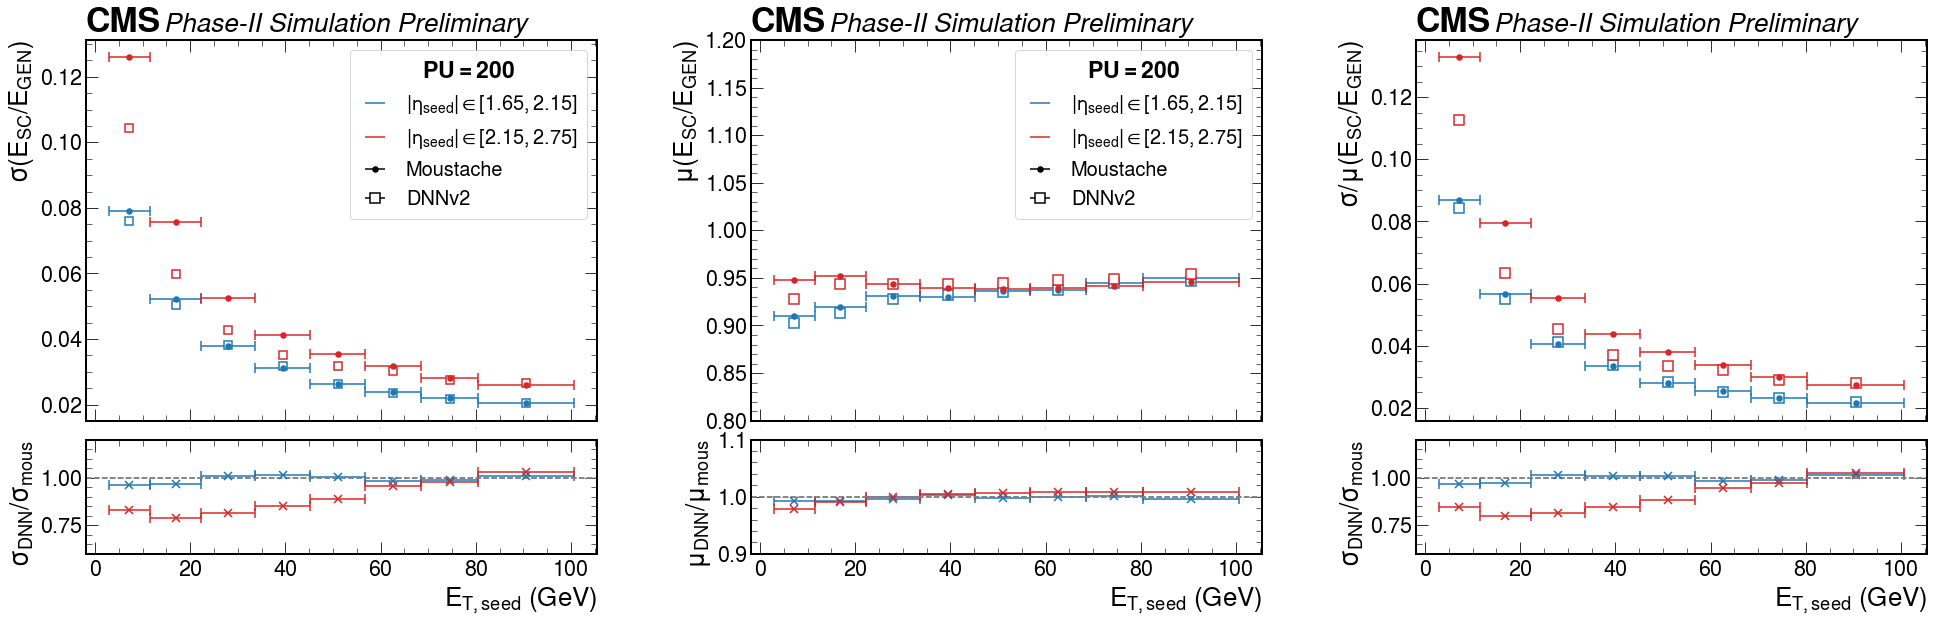

########### 1.65 2.15 ###########


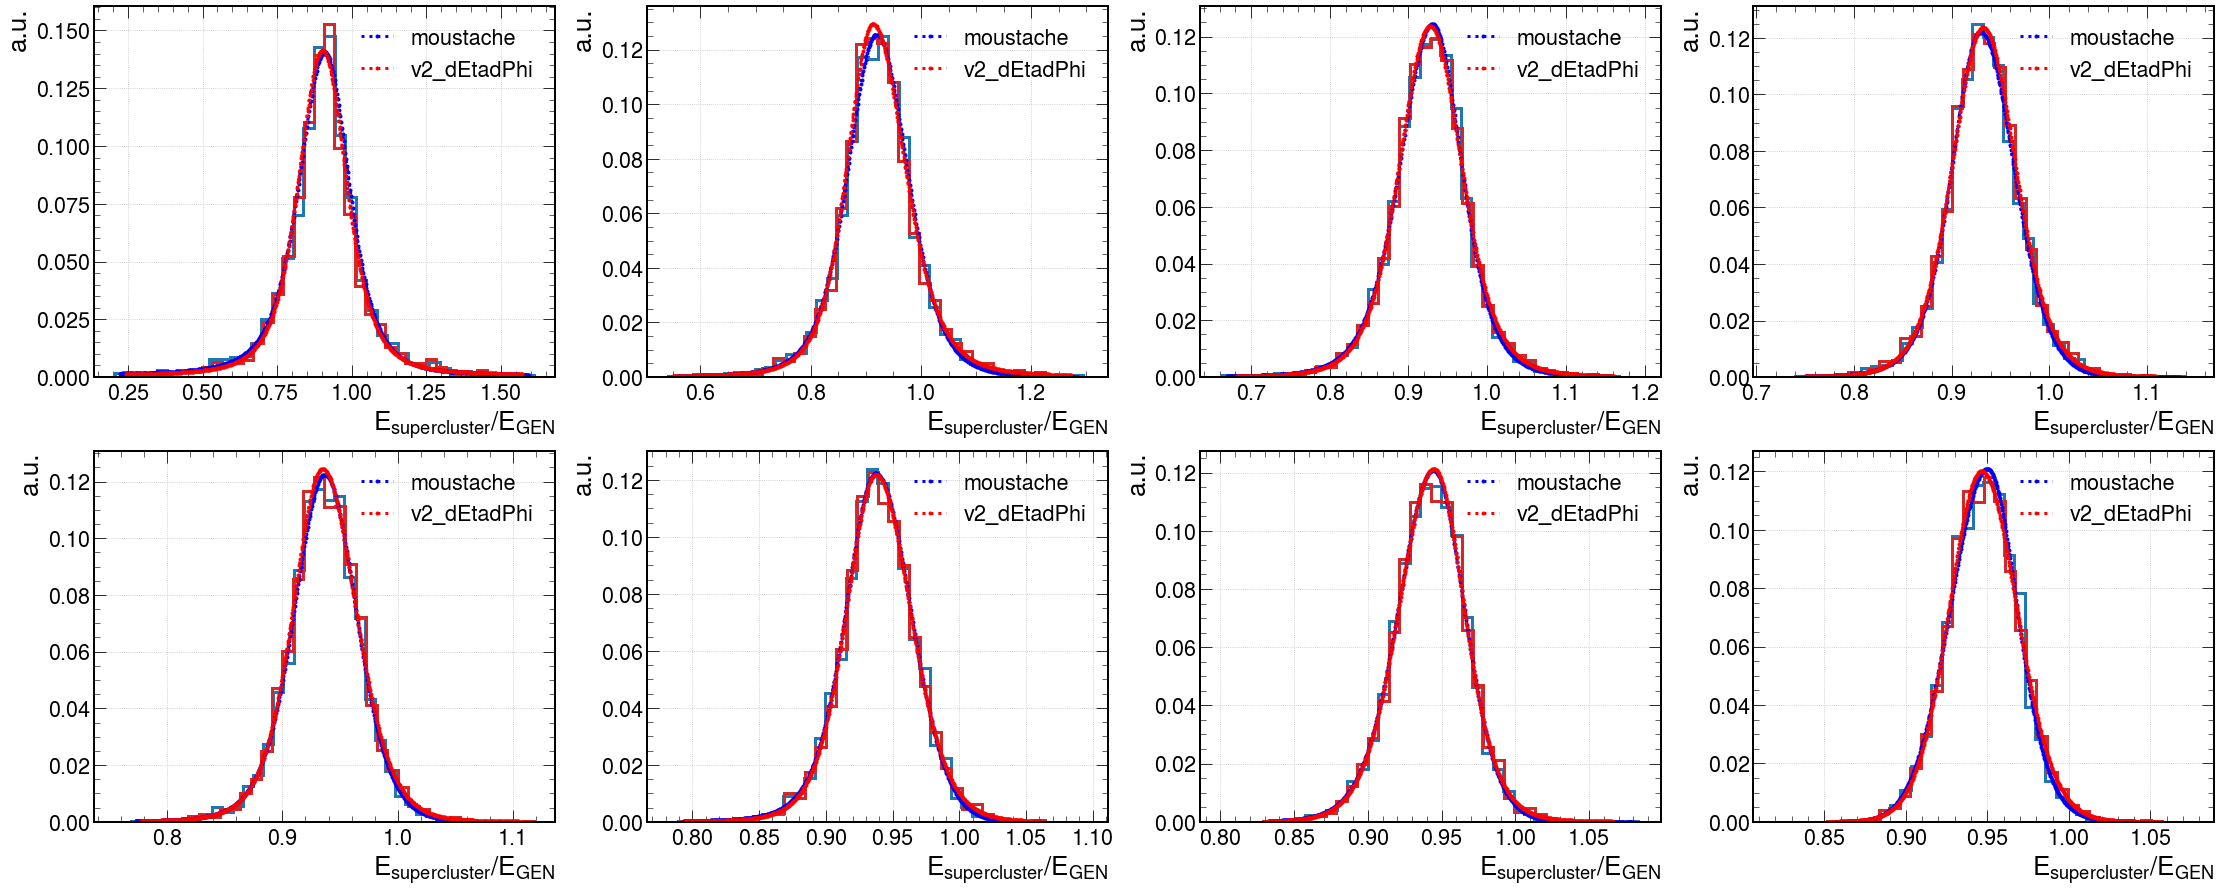

########### 2.15 2.75 ###########


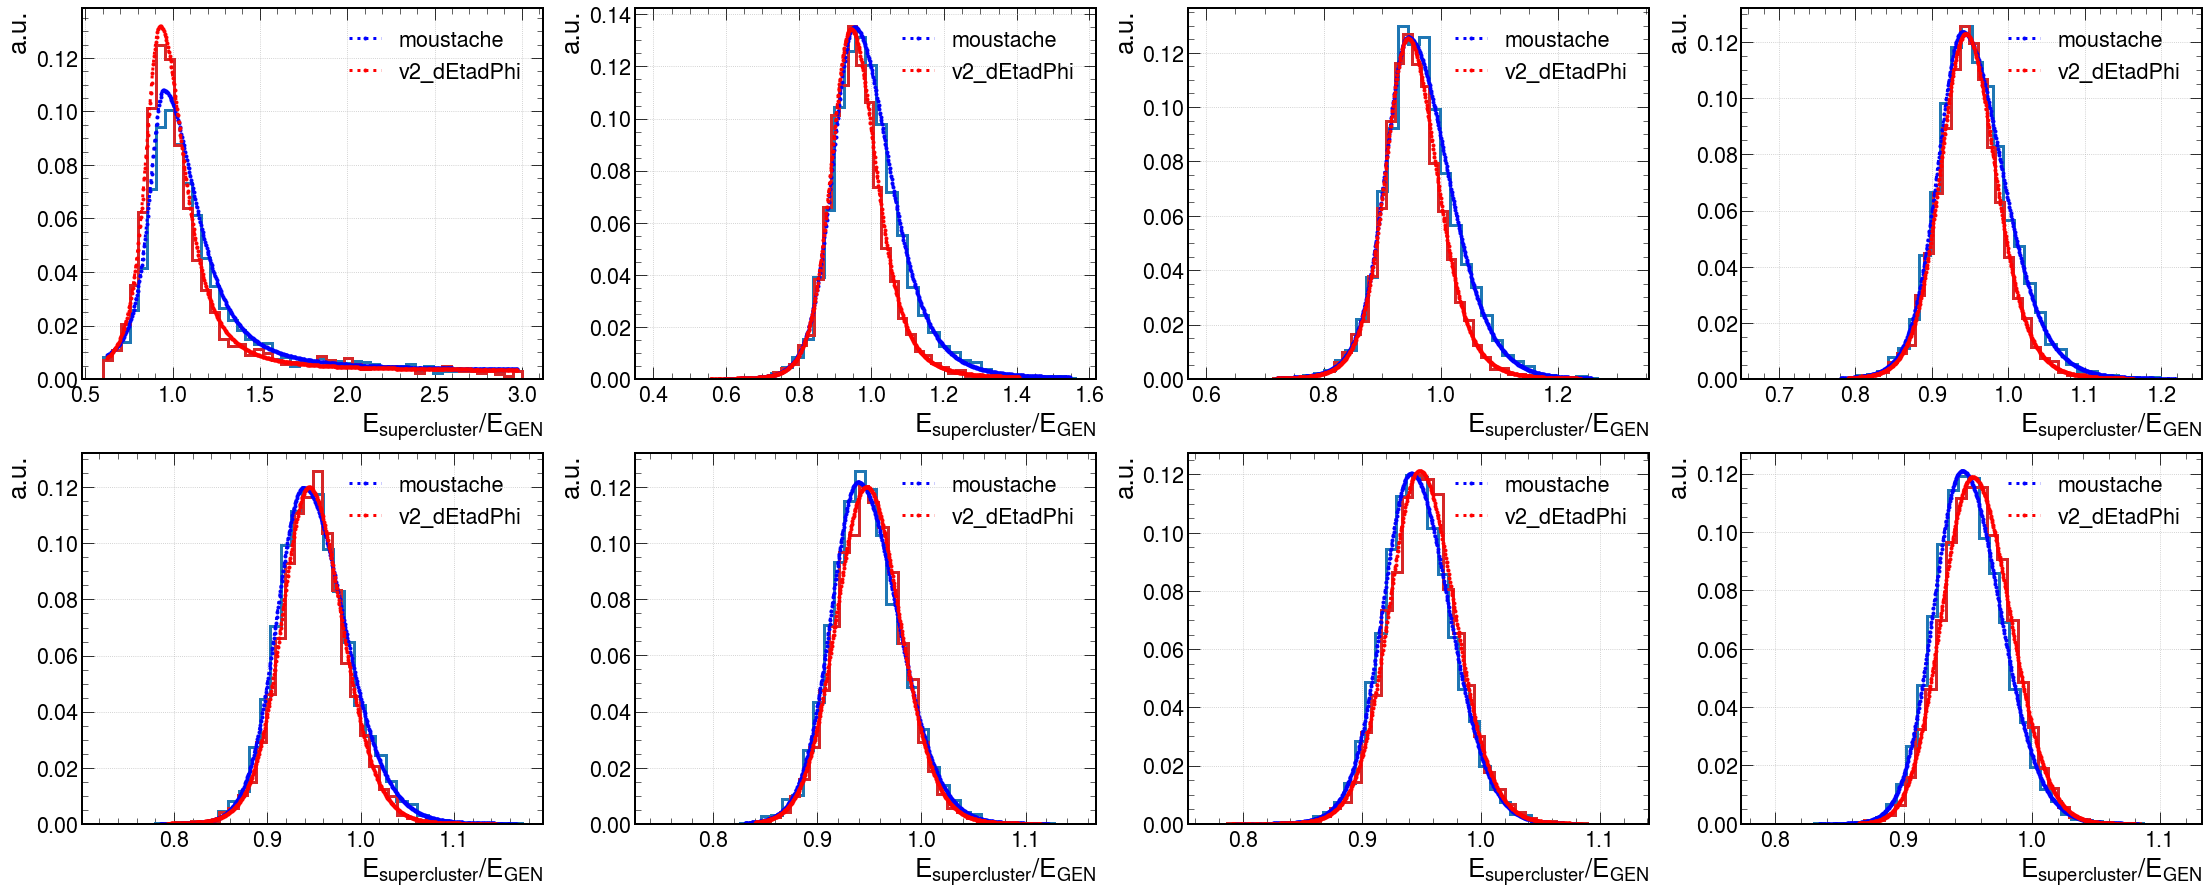

In [51]:
xlabels = {
    'gun_en'             : r'$E_{GEN}$ (GeV)',
    'gun_pt'             : r'$E_{T,GEN}$ (GeV)',
    'gun_eta_abs'        : r'$|\eta_{GEN}|$',
    'seedEn_noScale'     : r'$E_{seed}$ (GeV)',
    'seedPt_noScale'     : r'$E_{T,seed}$ (GeV)',
    'seedEtaAbs_noScale' : r'$\eta_{seed}$ (GeV)',
}

## The first entry must be moustache
variables_comparison = {}
variables_comparison = variables
variables_tmp = {'moustache': []}
variables_comparison = {**variables_tmp, **variables_comparison}

bin_var    = 'seedPt_noScale' ## Bins of the variables in which the resolution is plotted
bins       = histedges_equalN(observables_scaled[bin_var], 8)
bins_mean  = [(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]
bins_width = [(bins[i+1]-bins[i])/2 for i in range(len(bins)-1)]

resEtaVec, resEtaCleanVec = makeFinalResPlots('seedPt_noScale', 8, 'seedEtaAbs_noScale', '\eta_{seed}', True, _cleaned=True)
# resEtaVec, resEtaCleanVec = makeFinalResPlots('seedEtaAbs_noScale', 15, 'seedPt_noScale', 'pt_{seed}', False, _cleaned=True)
# res_eta_vec, res_eta_clean_vec = makeFinalResPlots('seedPt_noScale', 8, 'gun_eta_abs', '\eta_{GEN}', True, _cleaned=True)

# Features of the superclustered (and not superclustered) tracksters

In [52]:
def computeUnTrackstered(_DNNscore, _score, _recoPt, _name, _pTdep = False):
    _DNNscore = np.array(_DNNscore)
    _score    = np.array(_score)
    _recoPt   = np.array(_recoPt)
    
    if _pTdep:
        scores = []
        for idx, pTtrk in enumerate(_recoPt):  
            for key, value in scoresThrEn[_name].items():
                if key[0] <= pTtrk <= key[1] and _DNNscore[idx]<value:
                    scores.append(_score[idx])
        return scores
    else:
        return _score[_DNNscore<scoresThr[_name]]

    
    
def computeTrackstered(_DNNscore, _score, _recoPt, _name, _pTdep = False):
    _DNNscore = np.array(_DNNscore)
    _score    = np.array(_score)
    _recoPt   = np.array(_recoPt)

    if _pTdep:
        scores = []
        for idx, pTtrk in enumerate(_recoPt):  
            for key, value in scoresThrEn[_name].items():
                if key[0] <= pTtrk <= key[1] and _DNNscore[idx]>=value:
                    scores.append(_score[idx])
        return scores
    else:
        return _score[_DNNscore>=scoresThr[_name]]


In [53]:
#Initialise the dictionary
score_trackstered = {}
score_untrackstered = {}

en_trackstered = {}
en_untrackstered = {}

for name, var in variables.items():
    score_trackstered[name] = np.concatenate(np.array([np.array(sc)[np.array(DNNscore) >= scoresThr[name]] for DNNscore,sc in zip(observables_scaled['DNNscores_'+name], observables_scaled['score'])], dtype=object))
    score_untrackstered[name] = np.concatenate(np.array([np.array(sc)[np.array(DNNscore) < scoresThr[name]] for DNNscore,sc in zip(observables_scaled['DNNscores_'+name], observables_scaled['score'])], dtype=object))
    
#     score_trackstered[name] = np.concatenate([computeTrackstered(DNNscore, sc, pt, name, True) for DNNscore,sc, pt in zip(observables_scaled['DNNscores_'+name], observables_scaled['score'], observables_scaled['multi_en'])])
#     score_untrackstered[name] = np.concatenate([computeUnTrackstered(DNNscore, sc, pt, name, True) for DNNscore,sc, pt in zip(observables_scaled['DNNscores_'+name], observables_scaled['score'], observables_scaled['multi_en'])])
    
    ## This can be done only when using the unique WP
    en_trackstered[name] = np.concatenate(np.array([np.array(en)[np.array(DNNscore) >= scoresThr[name]] for DNNscore,sc,en in zip(observables_scaled['DNNscores_'+name], observables_scaled['score'],observables_scaled['multi_en_noScale'])], dtype=object))
    en_untrackstered[name] = np.concatenate(np.array([np.array(en)[np.array(DNNscore) < scoresThr[name]] for DNNscore,sc,en in zip(observables_scaled['DNNscores_'+name], observables_scaled['score'],observables_scaled['multi_en_noScale'])], dtype=object))

score_trackstered['mous']  = np.concatenate(np.array([np.array(sc)[np.array(mous) == True] for mous,sc in zip(observables_scaled['moustache'], observables_scaled['score'])], dtype=object))
score_untrackstered['mous']  = np.concatenate(np.array([np.array(sc)[np.array(mous) == False] for mous,sc in zip(observables_scaled['moustache'], observables_scaled['score'])], dtype=object))

en_trackstered['mous'] = np.concatenate(np.array([np.array(en)[np.array(mous) == True] for mous,sc,en in zip(observables_scaled['moustache'], observables_scaled['score'], observables_scaled['multi_en_noScale'])], dtype=object))
en_untrackstered['mous'] = np.concatenate(np.array([np.array(en)[np.array(mous) == False] for mous,sc,en in zip(observables_scaled['moustache'], observables_scaled['score'], observables_scaled['multi_en_noScale'])], dtype=object))


'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


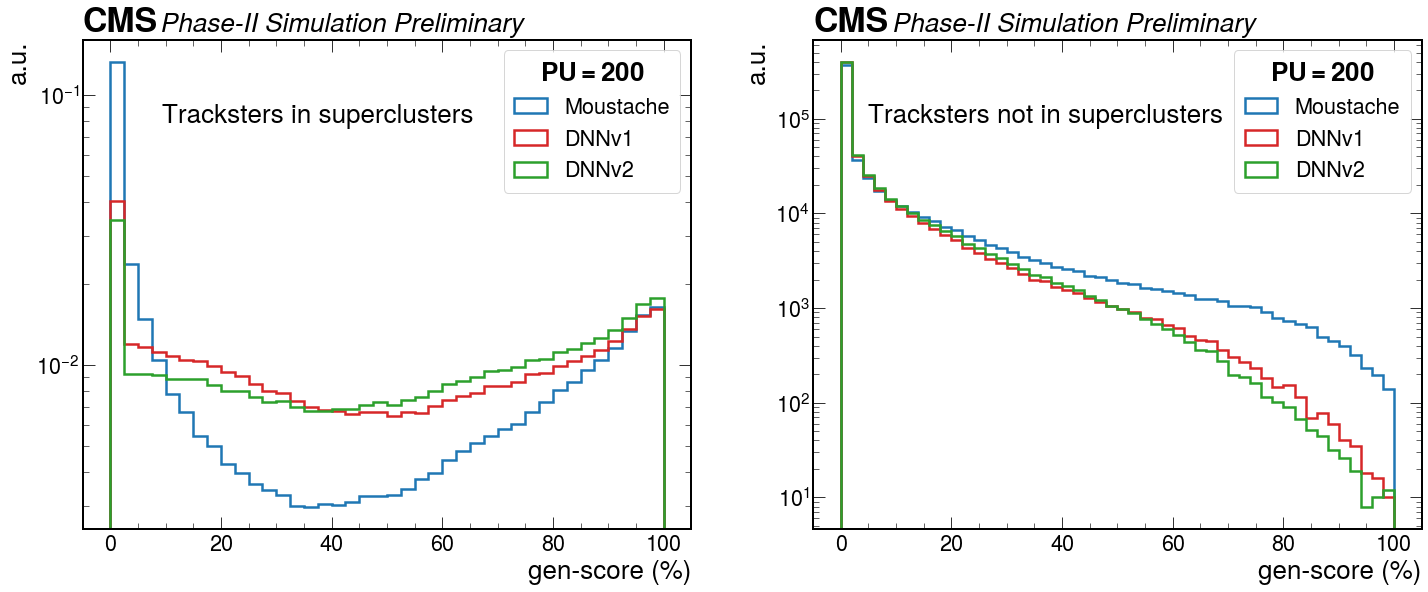

In [411]:
# fig = plt.figure(figsize=(10,7), dpi=80)
fig, axs = plt.subplots(1, 2, figsize=(24,9))
axs = axs.ravel()

colors = {'v1_dEtadPhi': 'tab:red',
          'v2_dEtadPhi': 'tab:green'}


n_s_v = []
n_s, bins_s, _ = axs[0].hist(score_trackstered['mous'], histtype='step', lw=2.5, range=[0,100], bins=40, density=True, label='Moustache')
n_s_v.append(n_s)
for name, var in variables.items():
    n_s, bins_s, _ = axs[0].hist(score_trackstered[name], histtype='step', lw=2.5, range=[0,100], bins=40, density=True, label='DNN'+name[:-9], color=colors[name])
    n_s_v.append(n_s)
hep.cms.label(llabel='Phase-II Simulation Preliminary',rlabel='', ax=axs[0])
axs[0].set_yscale('log')
axs[0].set_ylabel('a.u.')
axs[0].set_xlabel('gen-score (%)')
axs[0].legend(frameon=True, title=r'$\bf{PU = 200}$')
axs[0].text(0.13,0.83,'Tracksters in superclusters', transform=axs[0].transAxes)

n_ns_v = []
n_ns, bins_ns, _ = axs[1].hist(score_untrackstered['mous'], histtype='step', lw=2.5, range=[0,100], bins=50, density=False, label='Moustache')
n_ns_v.append(n_ns)
for name, var in variables.items():
    n_ns, bins_ns, _ = axs[1].hist(score_untrackstered[name], histtype='step', lw=2.5, range=[0,100], bins=50, density=False, label='DNN'+name[:-9], color=colors[name])
    n_ns_v.append(n_ns)
axs[1].set_yscale('log')
axs[1].set_ylabel('a.u.')
axs[1].set_xlabel('gen-score (%)')
axs[1].legend(frameon=True, title=r'$\bf{PU = 200}$')
axs[1].text(0.09,0.83,'Tracksters not in superclusters', transform=axs[1].transAxes)
hep.cms.label(llabel='Phase-II Simulation Preliminary',rlabel='', ax=axs[1])


plt.savefig('scoreTrackstered.pdf', dpi=500, bbox_inches='tight')
plt.show()

[  2.0000627    2.67256761   3.60265485   5.05545306   7.59047556
  12.82684565 251.1373291 ]


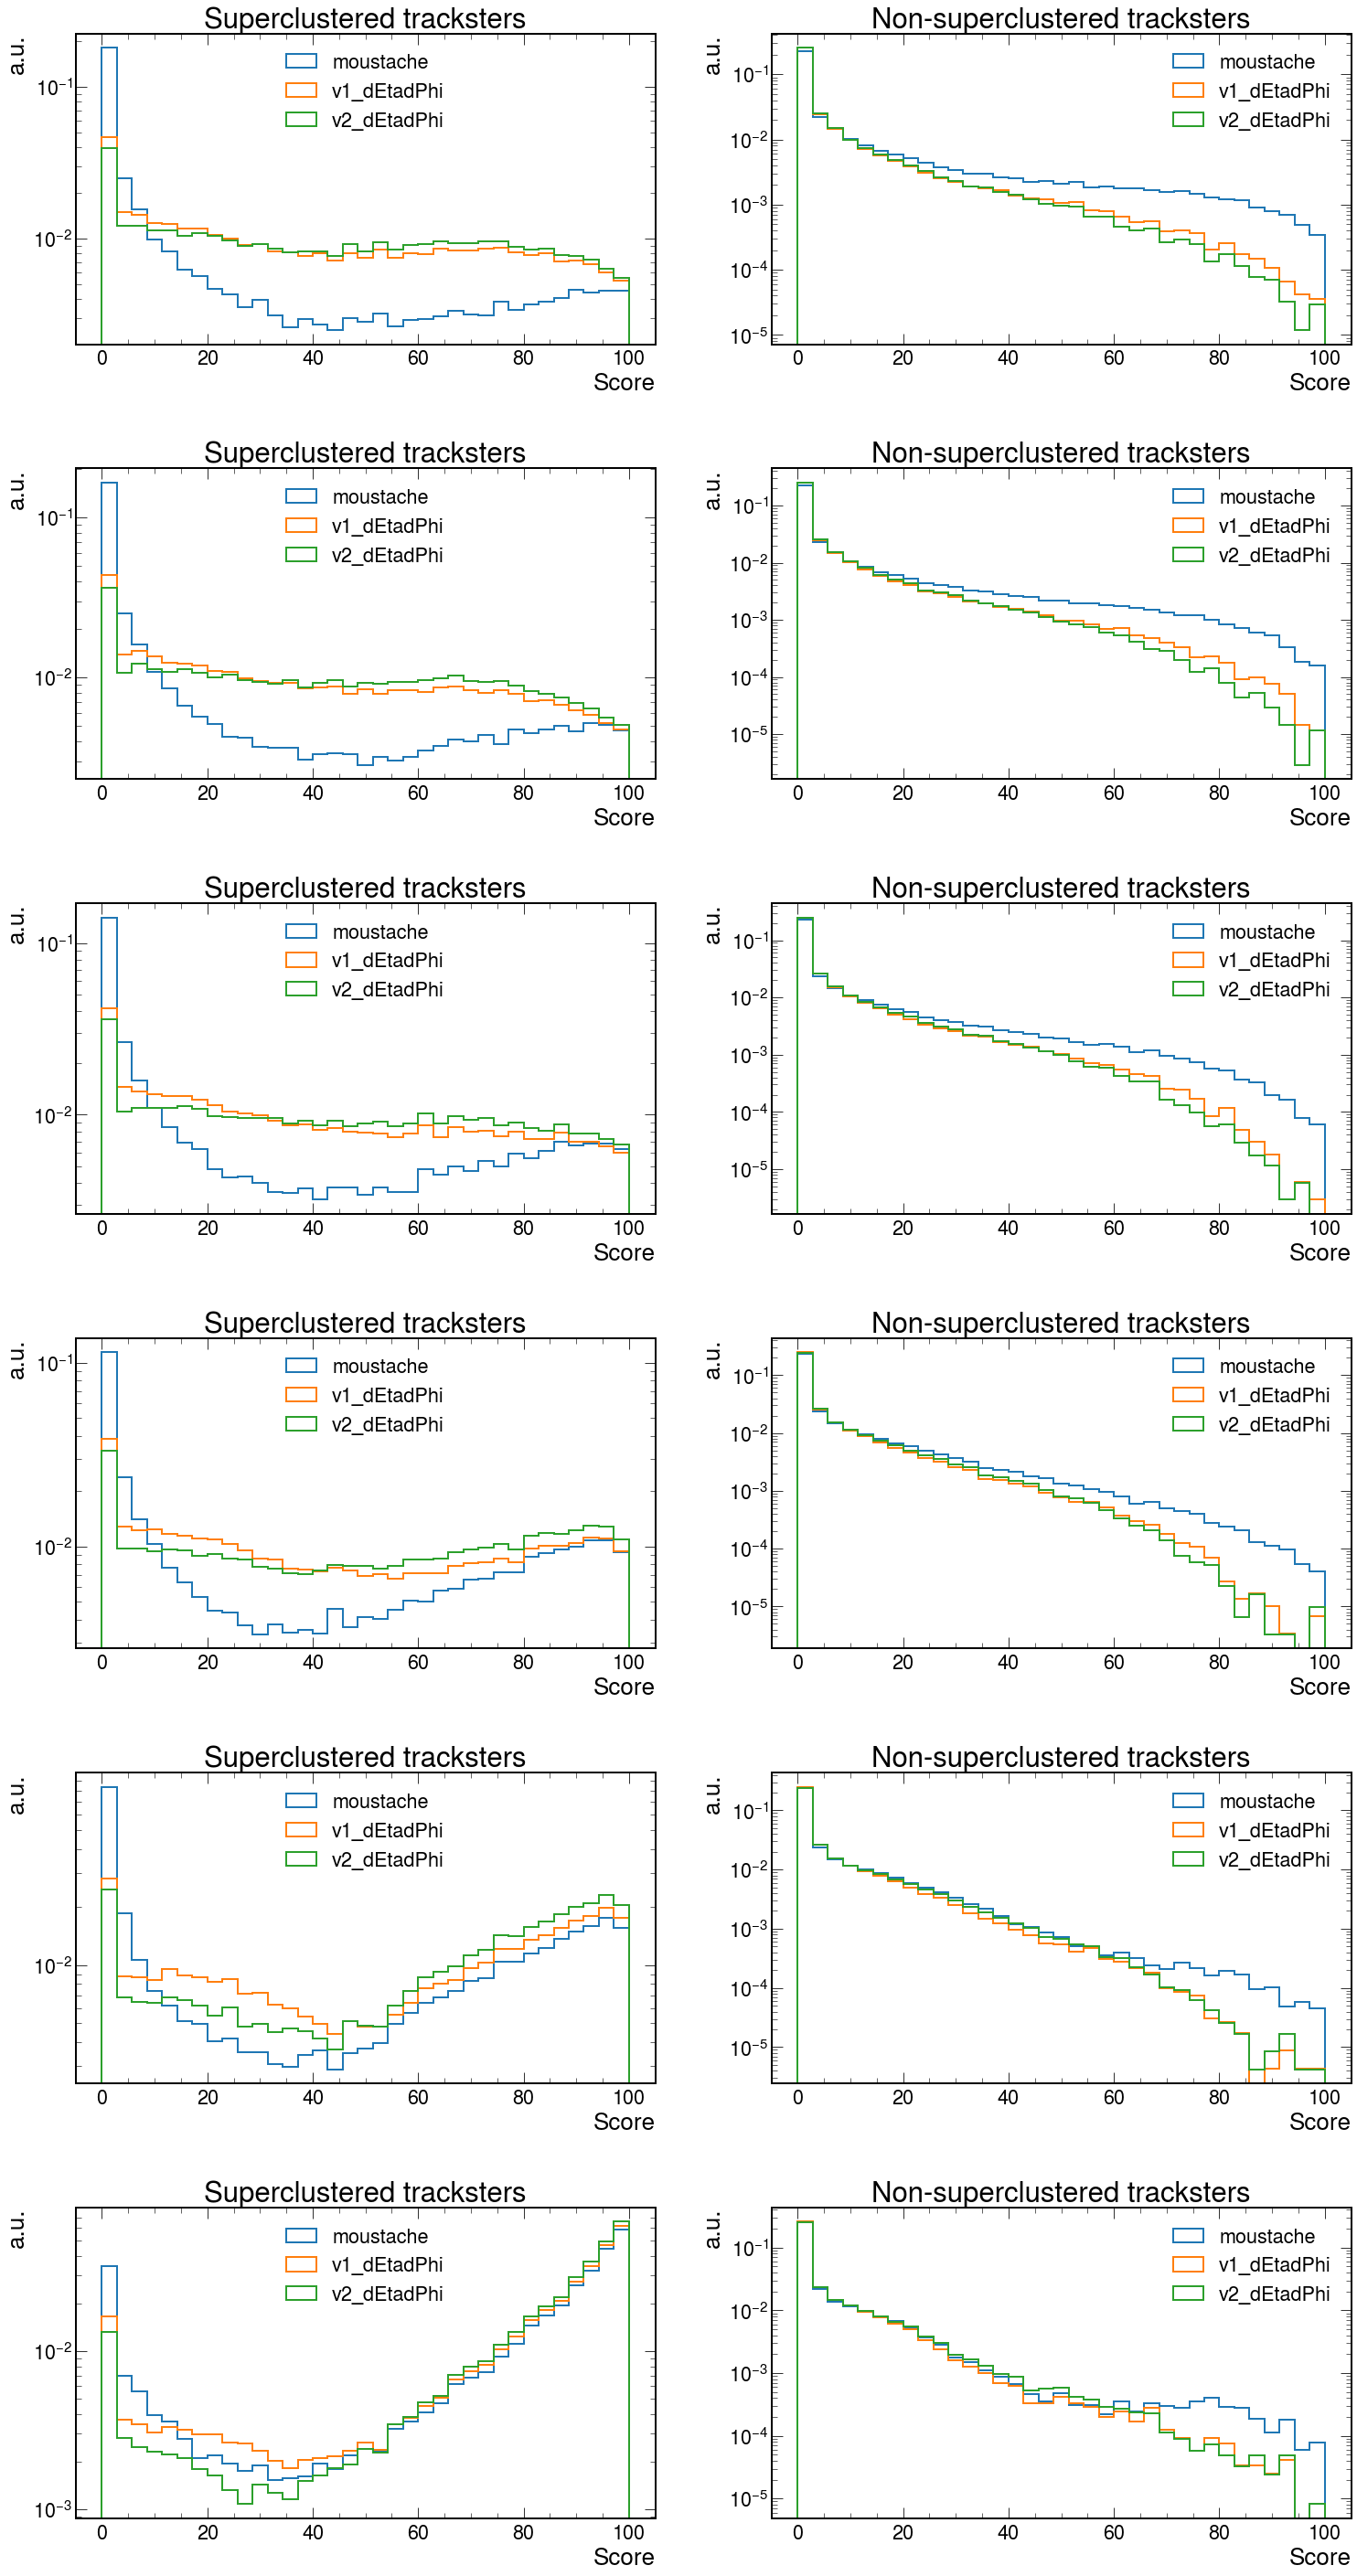

In [34]:
enBins = histedges_equalN(en_trackstered['mous'], 6)
print(enBins)

fig, axs = plt.subplots(6, 2, figsize=(25,50))

for b in range(len(enBins)-1):
    # axs[0].hist(score_trackstered['mous'], histtype='step', lw=2, range=[0,100], bins=50, density=True, label='moustache')
    axs[b,0].hist(score_trackstered['mous'][(en_trackstered['mous']>enBins[b]) & (en_trackstered['mous']<enBins[b+1])], histtype='step', lw=2, range=[0,100], bins=35, density=True, label='moustache')
    for name, var in variables.items():
    #     axs[0].hist(score_trackstered[name], histtype='step', lw=2, range=[0,100], bins=50, density=True, label=name)
        axs[b,0].hist(score_trackstered[name][(en_trackstered[name]>enBins[b]) & (en_trackstered[name]<enBins[b+1])], histtype='step', lw=2, range=[0,100], bins=35, density=True, label=name)
    axs[b,0].set_yscale('log')
    axs[b,0].set_ylabel('a.u.')
    axs[b,0].set_xlabel('Score')
    axs[b,0].legend(loc='upper center')
    axs[b,0].set_title('Superclustered tracksters')


    # axs[1].hist(score_untrackstered['mous'], histtype='step', lw=2, range=[0,100], bins=50, density=True, label='moustache')
    axs[b,1].hist(score_untrackstered['mous'][(en_untrackstered['mous']>enBins[b]) & (en_untrackstered['mous']<enBins[b+1])], histtype='step', lw=2, range=[0,100], bins=35, density=True, label='moustache')
    for name, var in variables.items():
    #     axs[1].hist(score_untrackstered[name], histtype='step', lw=2, range=[0,100], bins=50, density=True, label=name)
        axs[b,1].hist(score_untrackstered[name][(en_untrackstered[name]>enBins[b]) & (en_untrackstered[name]<enBins[b+1])], histtype='step', lw=2, range=[0,100], bins=35, density=True, label=name)
    axs[b,1].set_yscale('log')
    axs[b,1].set_ylabel('a.u.')
    axs[b,1].set_xlabel('Score')
    axs[b,1].legend()
    axs[b,1].set_title('Non-superclustered tracksters')

plt.subplots_adjust(hspace=0.4)
plt.show()

In [55]:
observables_flat_studies = {}
observables_flat_studies['DeltaEta'] = np.concatenate([arr for arr in observables_scaled['DeltaEta_noScale']])
observables_flat_studies['DeltaPhi'] = np.concatenate([arr for arr in observables_scaled['DeltaPhi_noScale']])
observables_flat_studies['score'] = np.concatenate([arr for arr in observables_scaled['score']])
observables_flat_studies['multi_en'] = np.concatenate([arr for arr in observables_scaled['multi_en_noScale']])
observables_flat_studies['multi_logen'] = np.concatenate([np.log10(arr) for arr in observables_scaled['multi_en_noScale']])
observables_flat_studies['multi_pt'] = np.concatenate([arr for arr in observables_scaled['multi_pt']])
observables_flat_studies['multi_eta'] = np.concatenate([arr for arr in observables_scaled['multi_eta']])
observables_flat_studies['moustache'] = np.concatenate([arr for arr in observables_scaled['moustache']])
observables_flat_studies['seedEta'] = np.array([observables_scaled['seedEtaAbs_noScale'][i] for i, arr in enumerate(observables_scaled['score']) for j in range(len(arr))])
observables_flat_studies['seedPt'] = np.array([observables_scaled['seedPt_noScale'][i] for i, arr in enumerate(observables_scaled['score']) for j in range(len(arr))])
# observables_flat_studies['seedEn'] = np.array([observables['seedEn'][i] for i, arr in enumerate(observables['score']) for j in range(len(arr))])
for name, var in variables.items():
    observables_flat_studies['DNNscores_'+name] = np.concatenate([arr for arr in observables_scaled['DNNscores_'+name]])
    
observables_flat_studies = pd.DataFrame.from_dict(observables_flat_studies)

1435.0
1500.0
1507.0


'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


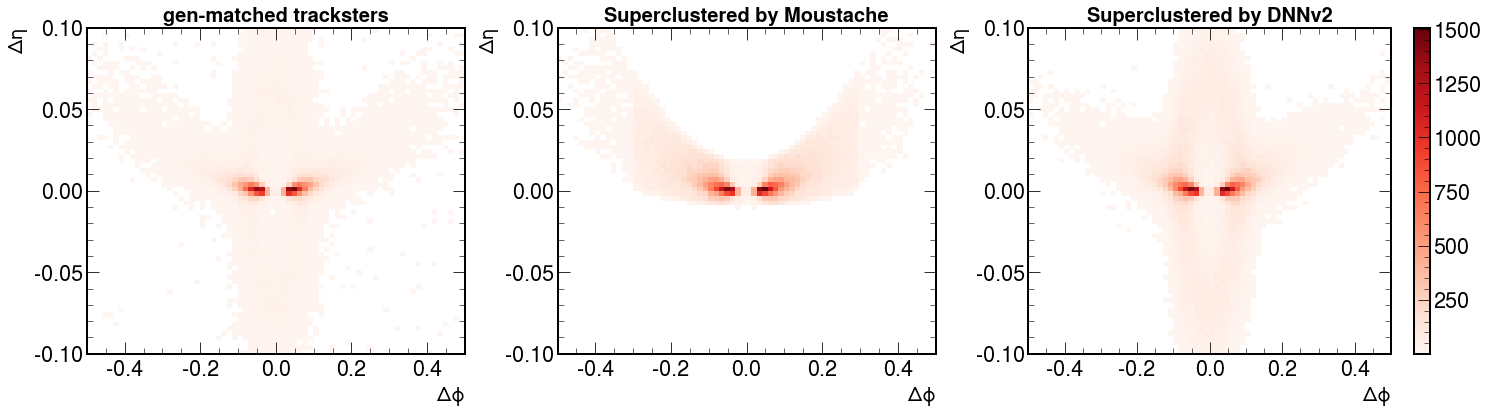

In [56]:
model = 'v2_dEtadPhi'

gs_kw = dict(width_ratios=[1,1,1.2], height_ratios=[1])

fig, axs = plt.subplots(1, 3, figsize=(25,6), gridspec_kw=gs_kw)
axs = axs.ravel()

cmap_reds = copy.copy(plt.cm.get_cmap("Reds"))
cmap_reds.set_under('white')

xrange = [-0.5, 0.5]
yrange = [-0.1, 0.1]

vmina = 1
vmaxa = 1507

# sel_kin = (observables_flat_studies['seedPt']>60) & (observables_flat_studies['seedEta']>2.15)

sel = (observables_flat_studies['DNNscores_'+model]>scoresThr[model]) & (observables_flat_studies['DeltaPhi']!=0) & (observables_flat_studies['DeltaEta']!=0) & (observables_flat_studies['score']!=0)# sel_kin
h_DNN = axs[2].hist2d(observables_flat_studies[sel]['DeltaPhi'], observables_flat_studies[sel]['DeltaEta'], cmap=cmap_reds, vmin=vmina, vmax=vmaxa, bins=70, range = [xrange, yrange])
axs[2].set_xlim(xrange)
axs[2].set_ylim(yrange)
axs[2].set_xlabel(r'$\Delta\phi$', fontsize = 20)
axs[2].set_ylabel(r'$\Delta\eta$', fontsize = 20)
axs[2].set_title('Superclustered by DNNv2', fontsize=20, fontweight="bold")

sel = (observables_flat_studies['moustache']==True) & (observables_flat_studies['DeltaPhi']!=0) & (observables_flat_studies['DeltaEta']!=0) & (observables_flat_studies['score']!=0)# sel_kin
h_mous = axs[1].hist2d(observables_flat_studies[sel]['DeltaPhi'], observables_flat_studies[sel]['DeltaEta'], cmap=cmap_reds, vmin=vmina, vmax=vmaxa, bins=70, range = [xrange, yrange])
axs[1].set_xlim(xrange)
axs[1].set_ylim(yrange)
axs[1].set_xlabel(r'$\Delta\phi$', fontsize = 20)
axs[1].set_ylabel(r'$\Delta\eta$', fontsize = 20)
axs[1].set_title('Superclustered by Moustache', fontsize=20, fontweight="bold")

sel = (observables_flat_studies['score']>60) & (observables_flat_studies['DeltaPhi']!=0) & (observables_flat_studies['DeltaEta']!=0) & (observables_flat_studies['score']!=0) # sel_kin
h_true = axs[0].hist2d(observables_flat_studies[sel]['DeltaPhi'], observables_flat_studies[sel]['DeltaEta'], cmap=cmap_reds, vmin=vmina, vmax=vmaxa, bins=70, range = [xrange, yrange])
axs[0].set_xlim(xrange)
axs[0].set_ylim(yrange)
axs[0].set_xlabel(r'$\Delta\phi$', fontsize = 20)
axs[0].set_ylabel(r'$\Delta\eta$', fontsize = 20)
axs[0].set_title('gen-matched tracksters', fontsize=20, fontweight="bold")
plt.colorbar(h_true[3], ax=axs[2])

print(max(h_true[0].flatten()))
print(max(h_DNN[0].flatten()))
print(max(h_mous[0].flatten()))

plt.subplots_adjust(wspace=0.23)
plt.savefig('dEtadPhiComparison.pdf', dpi=150, bbox_inches='tight')
plt.show()

[0, 30, 60, 100]


'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


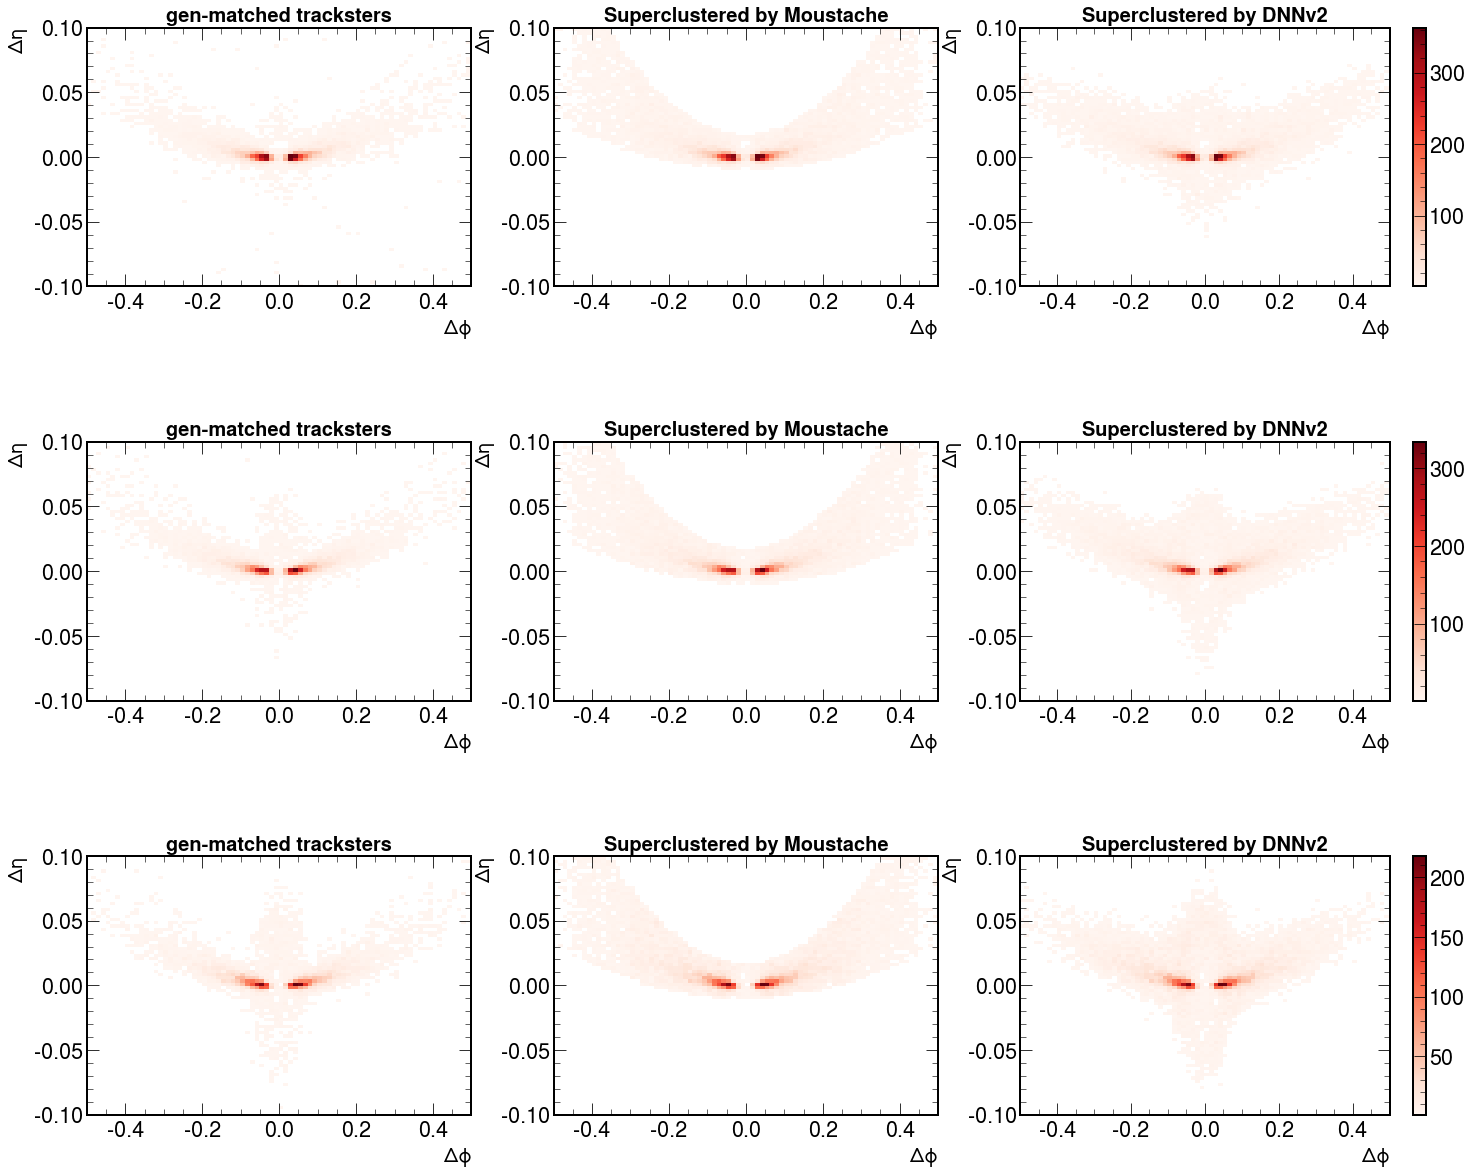

In [615]:
model = 'v2_dEtadPhi'

# gs_kw = dict(width_ratios=[1,1,1.2], height_ratios=[1,1,1,1,1,1])
gs_kw = dict(width_ratios=[1,1,1.2], height_ratios=[1,1,1])

fig, axs = plt.subplots(3, 3, figsize=(25,20), gridspec_kw=gs_kw)
# axs = axs.ravel()

cmap_reds = copy.copy(plt.cm.get_cmap("Reds"))
cmap_reds.set_under('white')

xrange = [-0.5, 0.5]
yrange = [-0.1, 0.1]

vmina = 1
vmaxa = 2607

# bins_enTrks = histedges_equalN(observables_flat_studies['multi_en'], 4)
bins_enTrks = [0, 30, 60, 100]
print(bins_enTrks)

sel_common = (observables_flat_studies['DeltaEta']!=0) & (abs(observables_flat_studies['seedEta'])>1.65) & (abs(observables_flat_studies['seedEta'])<2.15)

for b in range(len(bins_enTrks)-1):
#     sel = (observables_flat_studies['DNNscores_'+model]>scoresThr[model]) & sel_common & (observables_flat_studies['multi_en']>bins_enTrks[b]) & (observables_flat_studies['multi_en']<bins_enTrks[b+1])
    sel = (observables_flat_studies['DNNscores_'+model]>scoresThr[model]) & sel_common & (observables_flat_studies['seedPt']>bins_enTrks[b]) & (observables_flat_studies['seedPt']<bins_enTrks[b+1])
    h_DNN = axs[b,2].hist2d(observables_flat_studies[sel]['DeltaPhi'], observables_flat_studies[sel]['DeltaEta'], cmap=cmap_reds, bins=80, range = [xrange, yrange], vmin=vmina)#, vmax=vmaxa)
    axs[b,2].set_xlim(xrange)
    axs[b,2].set_ylim(yrange)
    axs[b,2].set_xlabel(r'$\Delta\phi$', fontsize = 20)
    axs[b,2].set_ylabel(r'$\Delta\eta$', fontsize = 20)
    axs[b,2].set_title('Superclustered by DNNv2', fontsize=20, fontweight="bold")

#     sel = (observables_flat_studies['moustache']==True) & sel_common & (observables_flat_studies['multi_en']>bins_enTrks[b]) & (observables_flat_studies['multi_en']<bins_enTrks[b+1])
    sel = (observables_flat_studies['moustache']==True) & sel_common & (observables_flat_studies['seedPt']>bins_enTrks[b]) & (observables_flat_studies['seedPt']<bins_enTrks[b+1])
    h_mous = axs[b,1].hist2d(observables_flat_studies[sel]['DeltaPhi'], observables_flat_studies[sel]['DeltaEta'], cmap=cmap_reds, bins=80, range = [xrange, yrange], vmin=vmina)#, vmax=vmaxa)
    axs[b,1].set_xlim(xrange)
    axs[b,1].set_ylim(yrange)
    axs[b,1].set_xlabel(r'$\Delta\phi$', fontsize = 20)
    axs[b,1].set_ylabel(r'$\Delta\eta$', fontsize = 20)
    axs[b,1].set_title('Superclustered by Moustache', fontsize=20, fontweight="bold")

#     sel = (observables_flat_studies['score']>60) & sel_common & (observables_flat_studies['multi_en']>bins_enTrks[b]) & (observables_flat_studies['multi_en']<bins_enTrks[b+1])
    sel = (observables_flat_studies['score']>60) & sel_common & (observables_flat_studies['seedPt']>bins_enTrks[b]) & (observables_flat_studies['seedPt']<bins_enTrks[b+1])
    h_true = axs[b,0].hist2d(observables_flat_studies[sel]['DeltaPhi'], observables_flat_studies[sel]['DeltaEta'], cmap=cmap_reds, bins=80, range = [xrange, yrange], vmin=vmina)#, vmax=vmaxa)
    axs[b,0].set_xlim(xrange)
    axs[b,0].set_ylim(yrange)
    axs[b,0].set_xlabel(r'$\Delta\phi$', fontsize = 20)
    axs[b,0].set_ylabel(r'$\Delta\eta$', fontsize = 20)
    axs[b,0].set_title('gen-matched tracksters', fontsize=20, fontweight="bold")
    plt.colorbar(h_true[3], ax=axs[b,2])
    
# plt.xlim(xrange)
plt.subplots_adjust(hspace=0.6)
plt.savefig('dEtadPhiBins.pdf', dpi=800, bbox_inches='tight')
plt.show()

# Isolation

In [57]:
def etaphi_from_cart(_x, _y, _z):
    theta = np.arccos(_z/np.sqrt(_x**2 + _y**2+ _z**2))
    eta   = -np.log(np.tan(theta/2)) #np.log is the natural logarithm
#     phi   = np.sign(_y) * np.arccos(_x/np.sqrt(_x**2+_y**2))
    phi   = math.atan2(_y,_x)
#     phi   = math.atan(_y/_x)
    return eta, phi


def SCed(_pts, _score, _mod):
    scoreBool = _score>scoresThr[_mod]
    argSeed = np.argmax(_pts)
    scoreBool[argSeed] = True
    return scoreBool


def computeHoverE(_lay, _en):
    HE = []
    for i in range(len(_lay)):
        en = np.array(_en[i])
        lay = np.array(_lay[i])
        H = sum(en[lay>26])
        E = sum(en[lay<=26])
        HE.append(H/E)
    return np.array(HE)


## Function to compute the pT of the supercluster
def SCpT(_ens, _etaSC, _sced):
    _ens = np.array(_ens)
    _sced = np.array(_sced)
    return sum(_ens[_sced])/np.cosh(_etaSC)


def weightAv(_a, _w):
    return sum(_a * _w) / sum(_w)


def SCposition(_x, _y, _z, _en, _score):
    _en    = np.array(_en, dtype=object)
    _x     = np.array(_x,  dtype=object)
    _y     = np.array(_y,  dtype=object)
    _z     = np.array(_z,  dtype=object)
    _score = np.array(_score)
                    
    x_mean = weightAv(np.concatenate(_x[_score]), np.concatenate(_en[_score]))
    y_mean = weightAv(np.concatenate(_y[_score]), np.concatenate(_en[_score]))
    z_mean = weightAv(np.concatenate(_z[_score]), np.concatenate(_en[_score]))
    
    eta_mean, phi_mean = etaphi_from_cart(x_mean, y_mean, z_mean)
    
    return [eta_mean, phi_mean]


def dR(_SC, _etas, _phis, _sced):
    SCeta = _SC[0]
    SCphi = _SC[1]
    
    dR = []
    for i in range(len(_etas)):
        if _sced[i] == False:
            dR.append( np.sqrt( (SCeta-_etas[i])**2 + (SCphi-_phis[i])**2 ) )
        else:
            ## If the trackster is not included 
            dR.append( 100 ) 
    
    dR = np.array(dR)
    return dR

def iso(_dR, _pts, _d, _sel, _selVal):
    _dR = np.array(_dR)
    _pts = np.array(_pts)
    return sum(_pts[(_dR<_d) & (_sel<=_selVal)])

In [58]:
## Create another column where the information of the trackters to superclusters are stored with an array of bools [True, False, False, etc.]
## In this way, the setup is similiar to the moustache column
observables_scaled_plot['DNNv1'] = [SCed(x,y,'v1_dEtadPhi') for x,y in zip(observables_scaled_plot['multi_pt_noScale'], observables_scaled_plot['DNNscores_v1_dEtadPhi'])]
observables_scaled_plot['DNNv2'] = [SCed(x,y,'v2_dEtadPhi') for x,y in zip(observables_scaled_plot['multi_pt_noScale'], observables_scaled_plot['DNNscores_v2_dEtadPhi'])]

## Compute H/E
observables_scaled_plot['HoverE'] = [computeHoverE(row[0], row[1]) for row in zip(observables_scaled_plot['LCl'], observables_scaled_plot['LCen'])]

In [ ]:
for mod in ['moustache', 'DNNv1', 'DNNv2']:
    ## Position of the SC formed by Moustache
    observables_scaled_plot['pos_'+mod] = [SCposition(row[0], row[1], row[2], row[3], row[4]) for row in zip(observables_scaled_plot['LCx'], 
                                                                                                             observables_scaled_plot['LCy'], 
                                                                                                             observables_scaled_plot['LCz'], 
                                                                                                             observables_scaled_plot['LCen'],
                                                                                                             observables_scaled_plot[mod])]

    ## Split the eta and phi coordinates
    observables_scaled_plot['SCeta_'+mod] = [x[0] for x in observables_scaled_plot['pos_'+mod]]
    observables_scaled_plot['SCphi_'+mod] = [x[1] for x in observables_scaled_plot['pos_'+mod]]
    
    ## pT of the supercluster
    observables_scaled_plot['pT_'+mod] = [SCpT(row[0], row[1], row[2]) for row in zip(observables_scaled_plot['multi_en_noScale'], 
                                                                                      observables_scaled_plot['SCeta_'+mod], 
                                                                                      observables_scaled_plot[mod])]

    ## Compute the dR
    observables_scaled_plot['dR_'+mod] = [dR(row[0], row[1], row[2], row[3]) for row in zip(observables_scaled_plot['pos_'+mod], 
                                                                                            observables_scaled_plot['multi_eta_noScale'], 
                                                                                            observables_scaled_plot['multi_phi_noScale'],
                                                                                            observables_scaled_plot[mod])]


    ## Compute the isolation
    observables_scaled_plot['iso_'+mod] = [iso(row[0], row[1], 0.3, row[2], 0) for row in zip(observables_scaled_plot['dR_'+mod], 
                                                                                              observables_scaled_plot['multi_pt_noScale'],
                                                                                              observables_scaled_plot['HoverE'])]


    ## Compute the relative isolation
    observables_scaled_plot['relIso_'+mod] = observables_scaled_plot['iso_'+mod] / observables_scaled_plot['pT_'+mod]


In [ ]:
## In some events the skimming procedure suppresses all gen-Matched tracksters
## In those cases, the seed is completely random. It is the trackster with the largest pT, but its a "random" trackster
## These events need to be studied
## In the meantime, with this array, these events can be suppressed
killNoGen = np.array([len(np.array(i)[np.array(i)==True])!=0 for i in observables_scaled_plot['genMatching']])

In [ ]:
sel = (killNoGen) #& (observables_scaled_plot['gun_eta_abs']<2.15) & (observables_scaled_plot['gun_pt']>60) #& (observables_scaled_plot['gun_pt']<30)

fig, axs = plt.subplots(1, 2, figsize=(25,7))
axs      = axs.ravel()

inset_axs0 = axs[0].inset_axes([0, -0.35, 1, 0.3], sharex=axs[0])
inset_axs1 = axs[1].inset_axes([0, -0.35, 1, 0.3], sharex=axs[1])

rangea = [0,15]
nbins=10

n_moustache, bins, _ = axs[0].hist(observables_scaled_plot['iso_moustache'][sel], bins=nbins, histtype='step', lw=2.5, range=rangea, label='Moustache', color='tab:blue', density=True)
n_DNNv1, bins, _     = axs[0].hist(observables_scaled_plot['iso_DNNv1'][sel], bins=nbins, histtype='step', lw=2.5, range=rangea, label='DNNv1', color='tab:green', density=True)
n_DNNv2, bins, _     = axs[0].hist(observables_scaled_plot['iso_DNNv2'][sel], bins=nbins, histtype='step', lw=2.5, range=rangea, label='DNNv2', color='tab:red', density=True)
axs[0].legend()
# axs[0].set_yscale('log')
axs[0].set_ylabel('a.u.')
axs[0].set_xlim(rangea)

bins_mean = [(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]
bins_width = [(bins[i+1]-bins[i])/2 for i in range(len(bins)-1)]

axs[0].tick_params(axis='x', labelsize=0)
ratio = np.array(n_DNNv1 / n_moustache)
inset_axs0.errorbar(bins_mean, ratio, xerr = bins_width, fmt='x', markeredgewidth=1.5, capsize=5, lw=1.5, markersize=8, label=name, color='tab:green')

ratio = np.array(n_DNNv2 / n_moustache)
inset_axs0.errorbar(bins_mean, ratio, xerr = bins_width, fmt='x', markeredgewidth=1.5, capsize=5, lw=1.5, markersize=8, label=name, color='tab:red')

inset_axs0.axhline(y=1, color='tab:blue', linestyle='--', lw=2)
inset_axs0.set_xlabel('Iso')
inset_axs0.set_xlim(rangea)


#######################################################

rangea = [0,1]
nbins=10

n_moustache, bins, _ = axs[1].hist(observables_scaled_plot['relIso_moustache'][sel], bins=nbins, histtype='step', lw=2.5, range=rangea, label='Moustache', color='tab:blue', density=True)
n_DNNv1, bins, _     = axs[1].hist(observables_scaled_plot['relIso_DNNv1'][sel], bins=nbins, histtype='step', lw=2.5, range=rangea, label='DNNv1', color='tab:green', density=True)
n_DNNv2, bins, _     = axs[1].hist(observables_scaled_plot['relIso_DNNv2'][sel], bins=nbins, histtype='step', lw=2.5, range=rangea, label='DNNv2', color='tab:red', density=True)
axs[1].legend()
axs[1].set_yscale('log')
axs[1].set_ylabel('a.u.')
axs[1].set_xlim(rangea)

bins_mean = [(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]
bins_width = [(bins[i+1]-bins[i])/2 for i in range(len(bins)-1)]

axs[1].tick_params(axis='x', labelsize=0)
ratio = np.array(n_DNNv1 / n_moustache)
inset_axs1.errorbar(bins_mean, ratio, xerr = bins_width, fmt='x', markeredgewidth=1.5, capsize=5, lw=1.5, markersize=8, label=name, color='tab:green')

ratio = np.array(n_DNNv2 / n_moustache)
inset_axs1.errorbar(bins_mean, ratio, xerr = bins_width, fmt='x', markeredgewidth=1.5, capsize=5, lw=1.5, markersize=8, label=name, color='tab:red')

inset_axs1.axhline(y=1, color='tab:blue', linestyle='--', lw=2)
inset_axs1.set_xlabel('RelIso')
inset_axs1.set_xlim(rangea)


plt.show()

# Event display for thesis

gunEn 11.538780212402344
gunEta 1.806355357170105
recoEn Mous 72.6182656288147
recoEn DNN 54.20640182495117
recoCleanEn Mous 66.31022579967976
recoCleanEn DNN 51.7051709741354
multi_en [4.990192413330078, 3.7587857246398926, 10.04417896270752, 8.047396659851074, 12.524454116821289, 5.872093677520752, 7.749351978302002, 2.3639113903045654, 13.182772636413574, 8.446305274963379, 16.313716888427734, 14.121635437011719, 2.502530813217163, 2.458179473876953, 6.934104919433594, 2.425682783126831, 4.014039993286133, 3.824974536895752, 13.430743217468262, 54.20640182495117, 4.542710304260254, 4.386014938354492]
score [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


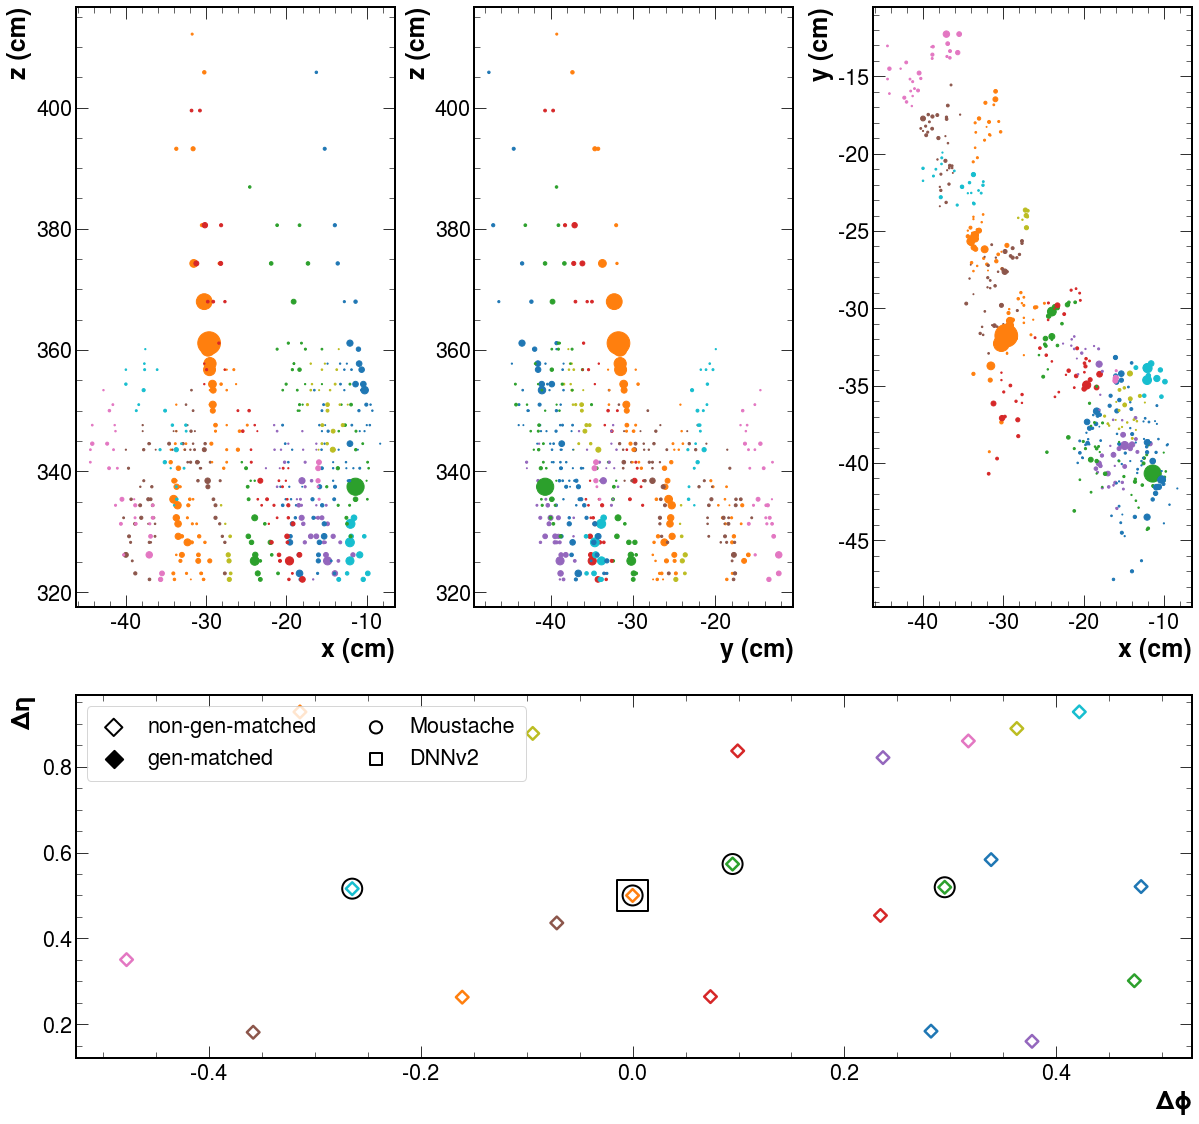

In [60]:
## 56741, 42599, 44937, 69171, 76077, 4185 (bellissimo), 4538, 6155, 7517 (bellissimo), 8424 (bellissimo), 12641, 20841, 6626 (bellissimo), 9837, 11080, 11447 (bellissimo), 12641, 14307, 19034, 29256
## 27850 sarebbe bello, ma i trackster sono un po' patologici
## interessanti -> 77616, 23063, 30735, 11081 (quelli presi da DNN hanno score poco sotto 60)
## Candidati tesi --> 11447, 56741
event = observables_scaled_plot.iloc[77653]

enMultiplier = 30

print('gunEn', event.gun_en)
print('gunEta', event.gun_eta)
print('recoEn Mous', sum(np.array(event.multi_en_noScale)[event.moustache]))
print('recoEn DNN', sum(np.array(event.multi_en_noScale)[event.DNNscores_v2_dEtadPhi>=0.52]))
print('recoCleanEn Mous', sum(np.array(event.cleaned_en)[event.moustache]))
print('recoCleanEn DNN', sum(np.array(event.cleaned_en)[event.DNNscores_v2_dEtadPhi>=0.52]))
print('multi_en', event.multi_en_noScale)
print('score', event.score)


# fig, (ax0,ax1,ax2) = plt.subplots(1, 3, figsize=(30,17))
fig = plt.figure(figsize=(20, 32))
plt.subplots_adjust(wspace= 0.25, hspace= 0.9)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:olive', 'tab:cyan', 
          'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:olive', 'tab:cyan',
          'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:olive', 'tab:cyan',
          'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:olive', 'tab:cyan',
          'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:olive', 'tab:cyan',
          'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:olive', 'tab:cyan',
          'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:olive', 'tab:cyan'
         ]

# colors = ['tab:brown', 'tab:orange', 'tab:green', 'tab:purple', 'tab:red', 'tab:blue', 'tab:pink', 'tab:olive', 'tab:cyan']


ax0 = fig.add_subplot(2,3,1) 
#ax0
for trk in range(len(np.array(event.LCx, dtype=object))):
    ax0.scatter(np.array(event.LCx, dtype=object)[trk], np.array(event.LCz, dtype=object)[trk], s=np.array(event.LCen, dtype=object)[trk]*enMultiplier, color=colors[trk])
ax0.set_xlabel('x (cm)', fontsize = 25, fontweight = 'bold')
ax0.set_ylabel('z (cm)', fontsize = 25, fontweight = 'bold')

ax1 = fig.add_subplot(2,3,2) 
#ax1
for trk in range(len(np.array(event.LCx, dtype=object))):
    ax1.scatter(np.array(event.LCy, dtype=object)[trk], np.array(event.LCz, dtype=object)[trk], s=np.array(event.LCen, dtype=object)[trk]*enMultiplier, color=colors[trk])
ax1.set_xlabel('y (cm)', fontsize = 25, fontweight = 'bold')
ax1.set_ylabel('z (cm)', fontsize = 25, fontweight = 'bold')

ax2 = fig.add_subplot(2,3,3) 
#ax2
for trk in range(len(np.array(event.LCx, dtype=object))):
    ax2.scatter(np.array(event.LCx, dtype=object)[trk], np.array(event.LCy, dtype=object)[trk], s=np.array(event.LCen, dtype=object)[trk]*enMultiplier, color=colors[trk])
ax2.set_xlabel('x (cm)', fontsize = 25, fontweight = 'bold')
ax2.set_ylabel('y (cm)', fontsize = 25, fontweight = 'bold')

ax3 = fig.add_subplot(3,3,(4,6)) 
#ax3
for trk in range(len(np.array(event.multi_en, dtype=object))):
    ax3.scatter(np.array(event.DeltaPhi_noScale, dtype=object)[trk], np.array(event.DeltaEta_noScale, dtype=object)[trk], 
                s=80, 
                facecolor='none', 
                lw=2.5, 
                edgecolor=colors[trk],
                marker= 'D')
    
    if event.genMatching[trk] == True:
        ax3.scatter(np.array(event.DeltaPhi_noScale, dtype=object)[trk], np.array(event.DeltaEta_noScale, dtype=object)[trk], 
                    s=80, 
                    lw=2, 
                    color=colors[trk],
                    marker= 'D')
        
    if event.moustache[trk] == True:
        ax3.scatter(np.array(event.DeltaPhi_noScale, dtype=object)[trk], np.array(event.DeltaEta_noScale, dtype=object)[trk], 
                    lw=2, 
                    s=400, 
                    marker='o', 
                    color='black', 
                    facecolor='none',
#                     color=colors[trk]
                   )

    if event.DNNscores_v2_dEtadPhi[trk] >=0.52:
        ax3.scatter(np.array(event.DeltaPhi_noScale, dtype=object)[trk], np.array(event.DeltaEta_noScale, dtype=object)[trk], 
                    lw=2, 
                    s=1000, 
                    marker='s', 
                    color='black', 
                    facecolor='none',
#                     color=colors[trk]
                   )
    
ax3.set_xlabel(r'$\Delta\phi$', fontsize = 25, fontweight = 'bold')
ax3.set_ylabel(r'$\Delta\eta$', fontsize = 25, fontweight = 'bold')


## For the legend
ax3.scatter([], [],  lw=2,  s=150,  marker='D',  facecolor='none',  edgecolor='black', label = 'non-gen-matched')
ax3.scatter([], [],  lw=2,  s=150,  marker='D',  color='black', label = 'gen-matched')
ax3.scatter([], [],  lw=2,  s=150,  marker='o',  color='black',  facecolor='none', label = 'Moustache')
ax3.scatter([], [],  lw=2,  s=150,  marker='s',  color='black',  facecolor='none', label = 'DNNv2')

ax3.legend(frameon=True, ncol=2)


plt.savefig('eleEventDisplay.pdf', dpi=500, bbox_inches='tight')
plt.show()
